# Downloading the dataset

In [1]:
#!pip uninstall gdown
#!pip install gdown --quiet
# !gdown

# Data Extraction

In [2]:
! unzip /content/ML_datasets-20230809T102746Z-001.zip

Archive:  /content/ML_datasets-20230809T102746Z-001.zip
  inflating: ML_datasets/bank-full.csv  
  inflating: ML_datasets/historical_data.csv  


# EDA

# Data Info

In [187]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [188]:
data_df = pd.read_csv("/content/ML_datasets/historical_data.csv")

In [189]:
data_df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [190]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [191]:
# Duplicates in dataset
count_duplicated = data_df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [192]:
# Counting Null Values
count_null_df=pd.DataFrame({'columns':data_df.columns,'number_of_nulls_values':data_df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
total_onshift_dashers,16262
total_busy_dashers,16262
total_outstanding_orders,16262
store_primary_category,4760
order_protocol,995
market_id,987
estimated_store_to_consumer_driving_duration,526
actual_delivery_time,7
created_at,0


In [193]:
# unique values for categorical features
data_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [194]:
data_df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


# Data Preprocess

In [195]:
# Removing NULL Values at first
# Currently removing all the rows of any column with null values completely for the first dry run of the model.
cols = ["total_onshift_dashers","total_busy_dashers","total_outstanding_orders","store_primary_category","order_protocol","market_id","estimated_store_to_consumer_driving_duration","actual_delivery_time"]
for col in cols:
  data_df = data_df[data_df[col].notna()]

In [196]:
data_df = data_df[data_df['total_busy_dashers'] <= data_df['total_onshift_dashers'] ]

In [197]:
# drop store_id and market_id as it is a categorical feature and has around 5500 classes
data_df = data_df.drop(["store_id"],axis=1)
data_df = data_df.drop(["market_id"],axis=1)

<ipython-input-198-a529e9b23fb1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)


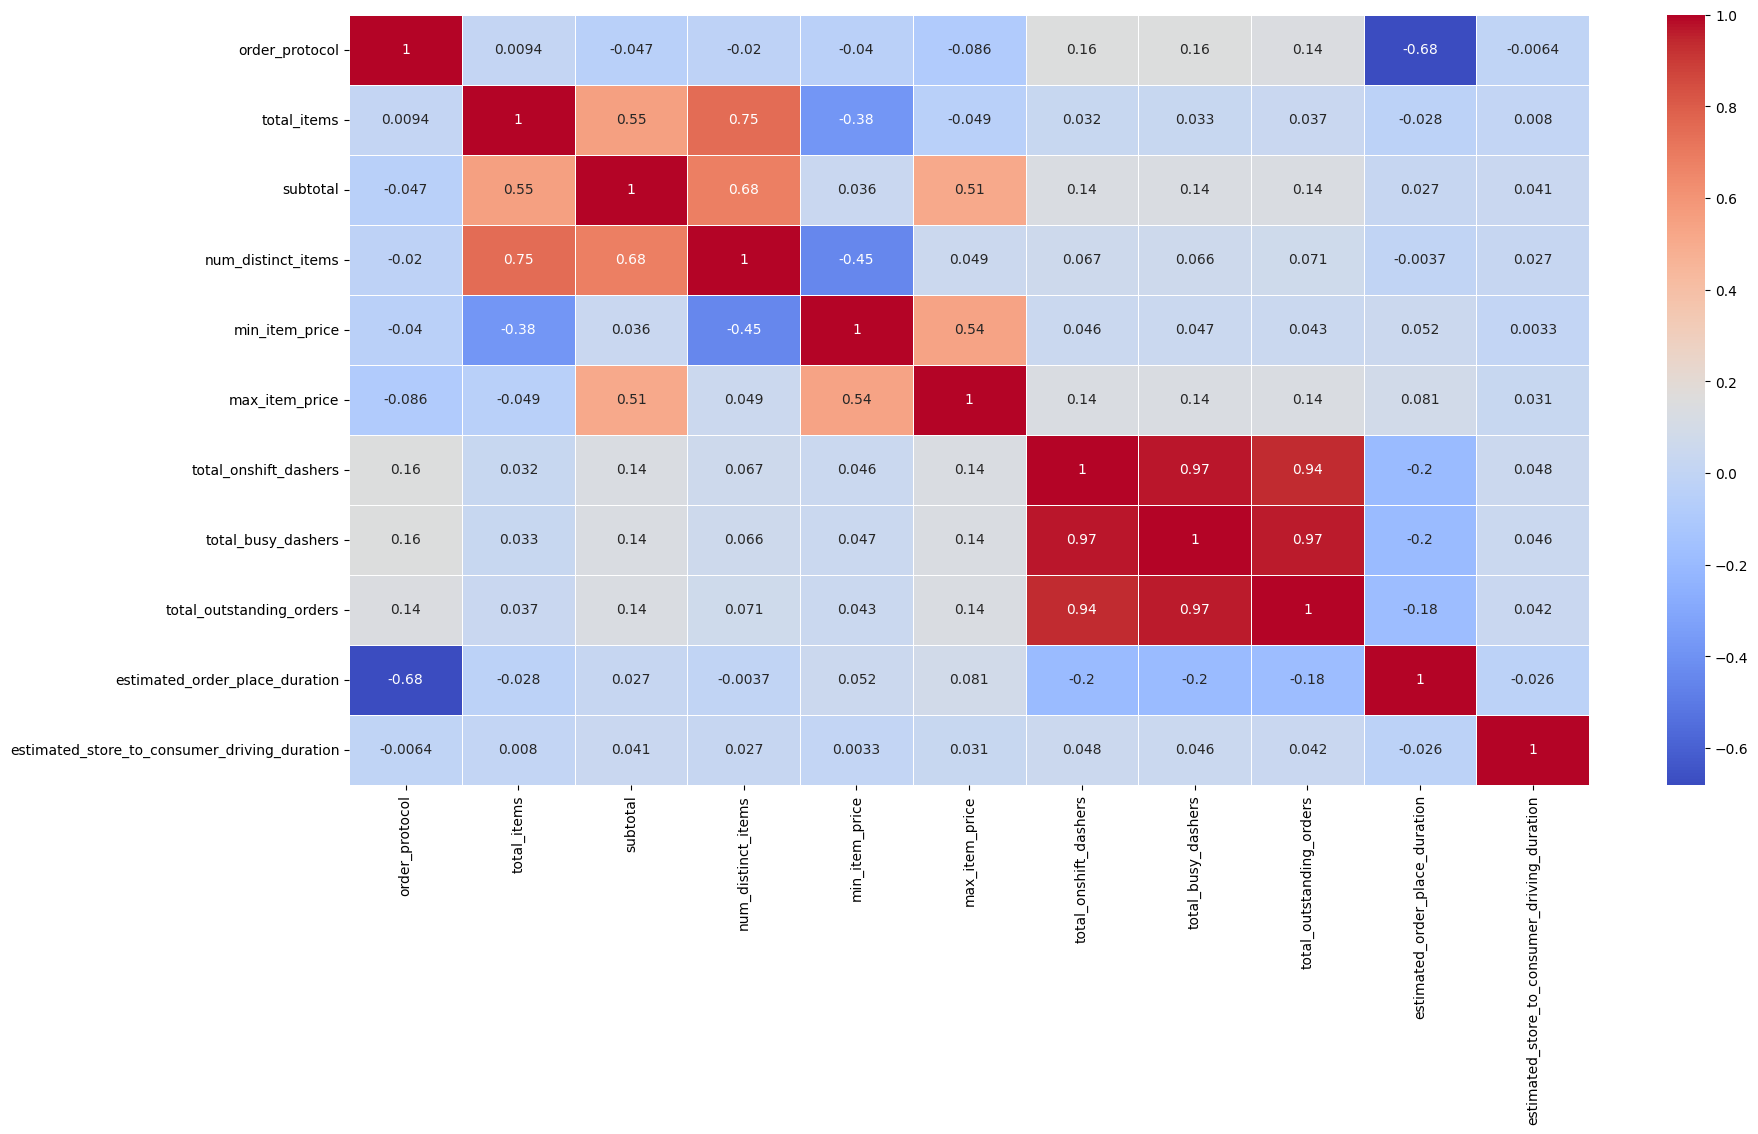

In [198]:
# check for multi-colinearity
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(data_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [199]:
# drop columns with high colinearity
data_df = data_df[data_df['total_onshift_dashers']>0]
data_df['total_busy_dashers'] = data_df['total_busy_dashers'] / data_df["total_onshift_dashers"]
data_df = data_df.drop(["total_onshift_dashers"],axis=1)
data_df

<ipython-input-199-d4a29eae05b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['total_busy_dashers'] = data_df['total_busy_dashers'] / data_df["total_onshift_dashers"]


,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,0.424242,21.0,446,861.0
8,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3.0,4,4771,3,820,1604,0.750000,18.0,446,289.0
15,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1.0,2,3620,2,1425,2195,1.000000,7.0,446,205.0
16,2015-02-06 00:42:42,2015-02-06 02:10:29,italian,1.0,3,4475,3,925,1825,0.250000,1.0,446,542.0
17,2015-02-08 02:04:17,2015-02-08 03:27:13,italian,1.0,3,4375,3,1325,1625,0.666667,3.0,446,789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197420,2015-02-18 02:16:04,2015-02-18 03:12:36,indian,3.0,3,2352,3,499,685,1.000000,65.0,251,560.0
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4.0,3,1389,3,345,649,1.000000,23.0,251,331.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4.0,6,3010,4,405,825,0.916667,14.0,251,915.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1.0,1,1175,1,535,535,1.000000,12.0,446,384.0


# Feature Extraction

In [200]:
# Converting the order time and delivery time stamp into delivery duration.
start_times = data_df['created_at'].to_list()
end_times = data_df['actual_delivery_time'].to_list()
delivery_duration = []
for i in range(len(start_times)):
  start = start_times[i][-8:].split(":")[:2]
  end = end_times[i][-8:].split(":")[:2]
  duration = (int(end[0])-int(start[0]))*3600 + (int(end[1])-int(start[1]))*60
  delivery_duration.append(duration)

In [201]:
# Getting the target variable "delivery time" from order created-at and actual-delivery-time.
data_df["delivery_duration"] = delivery_duration

In [202]:
data_df.shape # the delivery_duration column is added succesfully.

(132981, 14)

In [203]:
# drop the two columns now
data_df = data_df.drop(["created_at","actual_delivery_time"],axis=1)

In [204]:
# drop rows where delivery_duration is -ve
data_df = data_df.drop(data_df.index[data_df['delivery_duration'] < 0])

In [205]:
data_df

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
0,american,1.0,4,3441,4,557,1239,0.424242,21.0,446,861.0,3780
8,indian,3.0,4,4771,3,820,1604,0.750000,18.0,446,289.0,1620
15,italian,1.0,2,3620,2,1425,2195,1.000000,7.0,446,205.0,3000
16,italian,1.0,3,4475,3,925,1825,0.250000,1.0,446,542.0,5280
17,italian,1.0,3,4375,3,1325,1625,0.666667,3.0,446,789.0,4980
...,...,...,...,...,...,...,...,...,...,...,...,...
197420,indian,3.0,3,2352,3,499,685,1.000000,65.0,251,560.0,3360
197423,fast,4.0,3,1389,3,345,649,1.000000,23.0,251,331.0,3900
197424,fast,4.0,6,3010,4,405,825,0.916667,14.0,251,915.0,3420
197426,sandwich,1.0,1,1175,1,535,535,1.000000,12.0,446,384.0,3900


<ipython-input-206-a529e9b23fb1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)


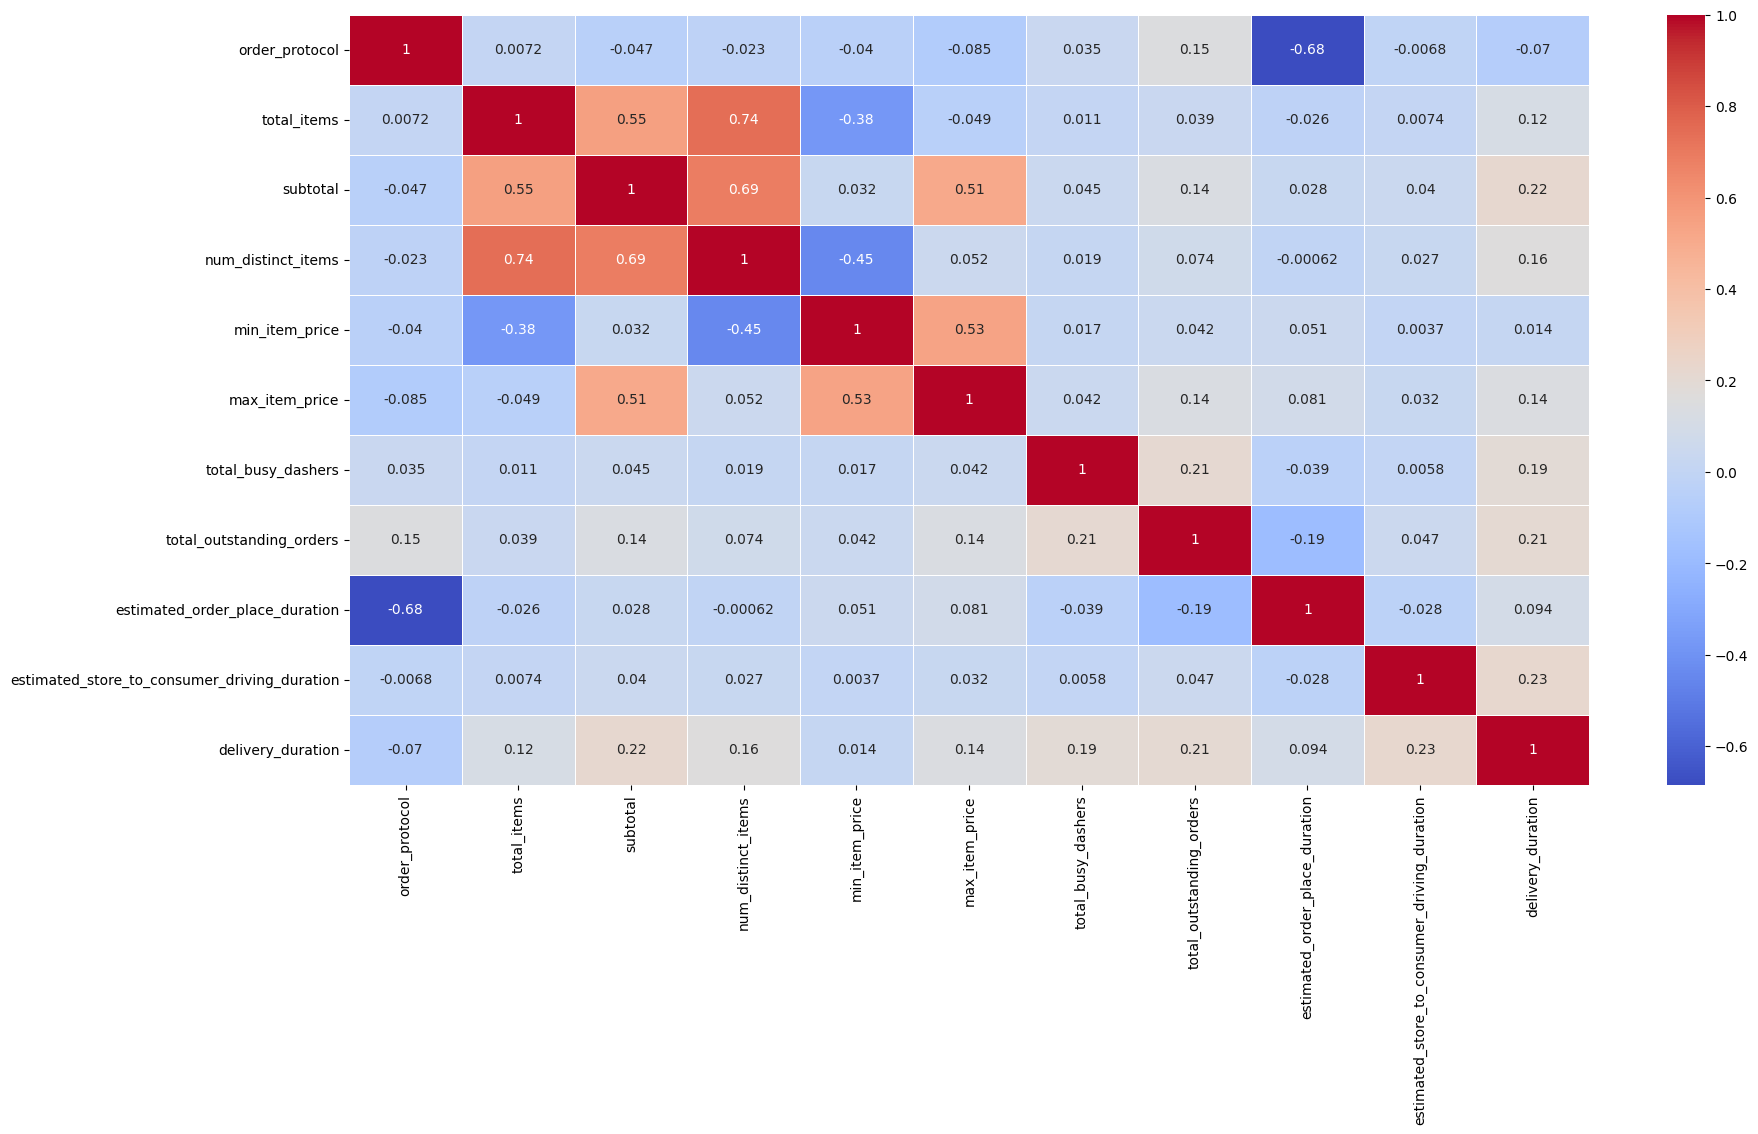

In [206]:
# check for multi-colinearity
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(data_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [207]:
data_df = data_df[data_df["total_items"]>0]
data_df["num_distinct_items"] = data_df["num_distinct_items"] / data_df["total_items"]
data_df = data_df.drop(["total_items"], axis=1)
data_df

,store_primary_category,order_protocol,subtotal,num_distinct_items,min_item_price,max_item_price,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
0,american,1.0,3441,1.000000,557,1239,0.424242,21.0,446,861.0,3780
8,indian,3.0,4771,0.750000,820,1604,0.750000,18.0,446,289.0,1620
15,italian,1.0,3620,1.000000,1425,2195,1.000000,7.0,446,205.0,3000
16,italian,1.0,4475,1.000000,925,1825,0.250000,1.0,446,542.0,5280
17,italian,1.0,4375,1.000000,1325,1625,0.666667,3.0,446,789.0,4980
...,...,...,...,...,...,...,...,...,...,...,...
197420,indian,3.0,2352,1.000000,499,685,1.000000,65.0,251,560.0,3360
197423,fast,4.0,1389,1.000000,345,649,1.000000,23.0,251,331.0,3900
197424,fast,4.0,3010,0.666667,405,825,0.916667,14.0,251,915.0,3420
197426,sandwich,1.0,1175,1.000000,535,535,1.000000,12.0,446,384.0,3900


<ipython-input-208-a529e9b23fb1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)


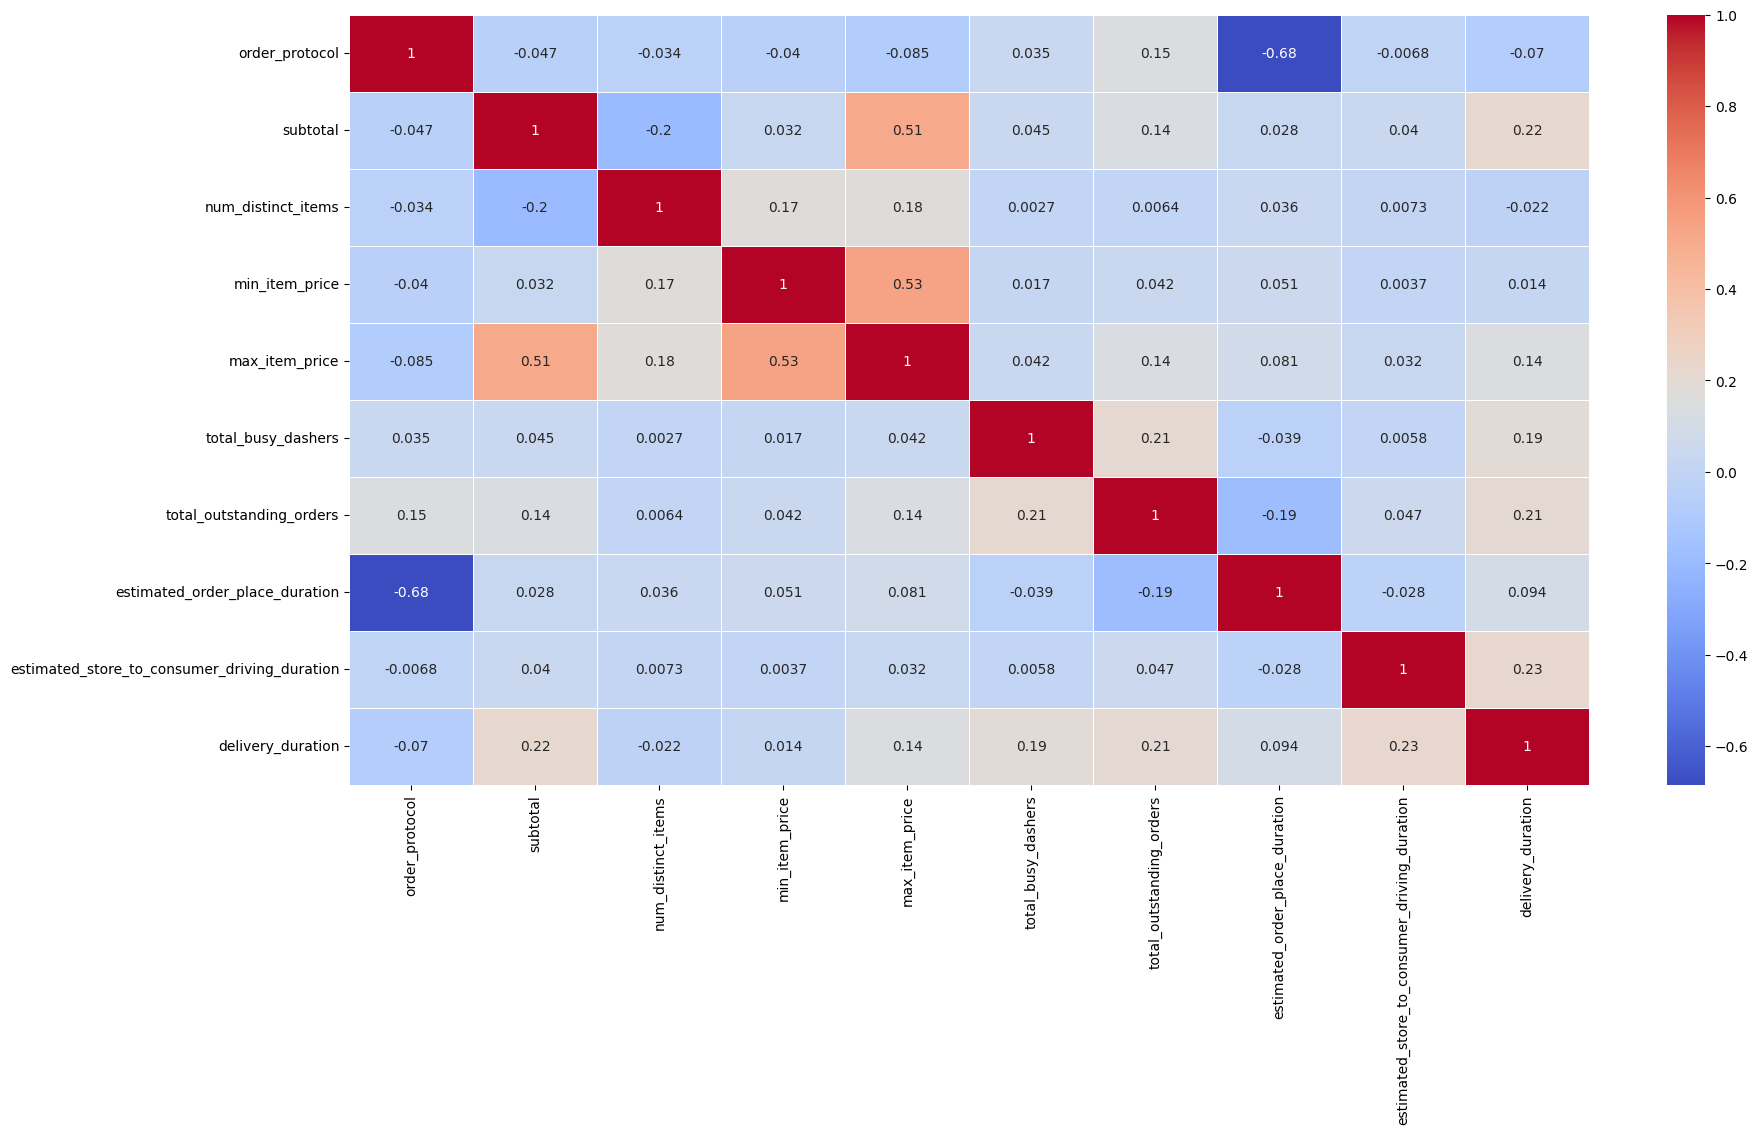

In [208]:
# check for multi-colinearity
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(data_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [209]:
data_df=pd.get_dummies(data_df, columns=['store_primary_category','order_protocol'], prefix=['store_primary_category','order_protocol'], drop_first=True)
data_df.shape

(129192, 87)

## Rough section

In [210]:
 data_df.isnull().sum()

subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
total_busy_dashers    0
                     ..
order_protocol_3.0    0
order_protocol_4.0    0
order_protocol_5.0    0
order_protocol_6.0    0
order_protocol_7.0    0
Length: 87, dtype: int64

## Rough ends

# Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


<Axes: >

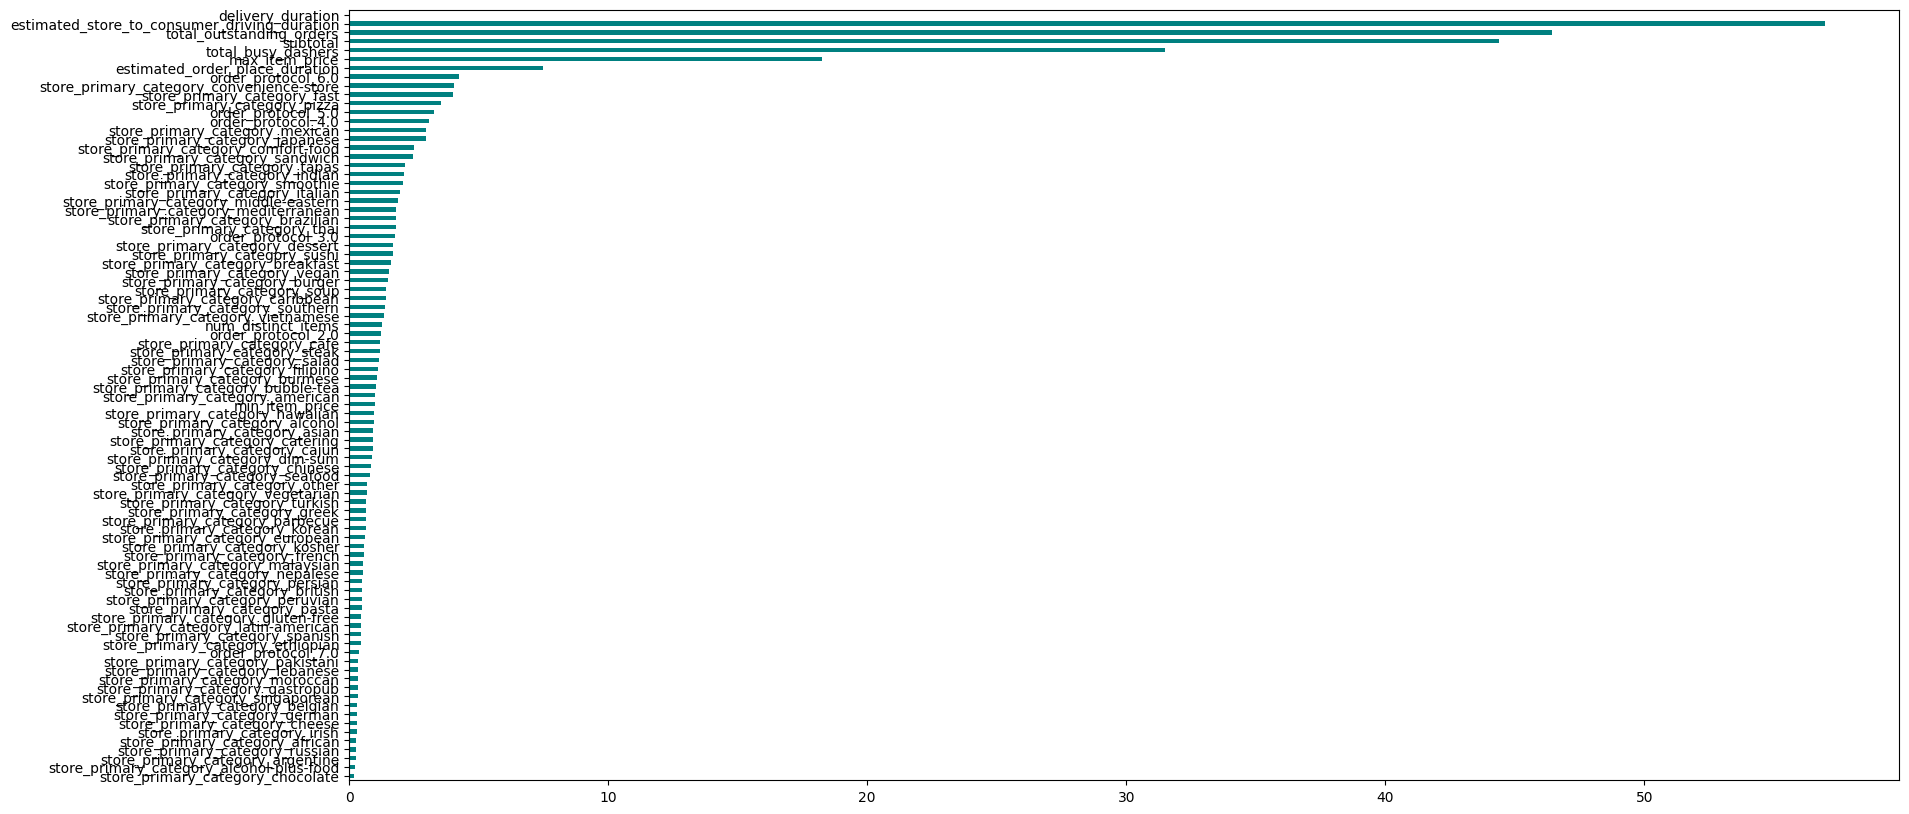

In [211]:
# ANOVA for categorical feature slection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

numericals = data_df
y = data_df["delivery_duration"]

scores = f_classif(numericals, y)
plt.figure(figsize=(20,10))
feat_importance = pd.Series(scores[0], numericals.columns[:])
feat_importance = feat_importance.sort_values(ascending=True)
feat_importance.plot(kind='barh', color='teal')

In [212]:
# removing columns for which the P_value is greater than 0.05
coltorem = []
colnottorem = ['total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_busy_dashers', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration','','delivery_duration']
for i in range(len(data_df.columns)):
  if scores[1][i] > 0.05:
    coltorem.append(data_df.columns[i])

for col in coltorem:
  if col not in colnottorem:
    data_df = data_df.drop([col],axis=1)

# Outlier Detection

<ipython-input-213-7d6af7ef4053>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,6))


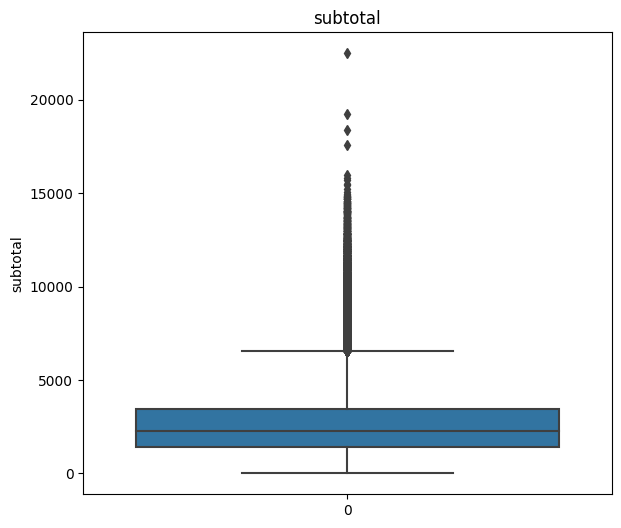

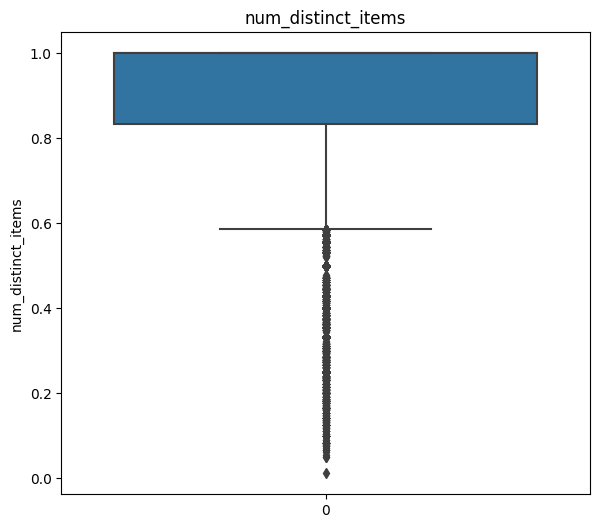

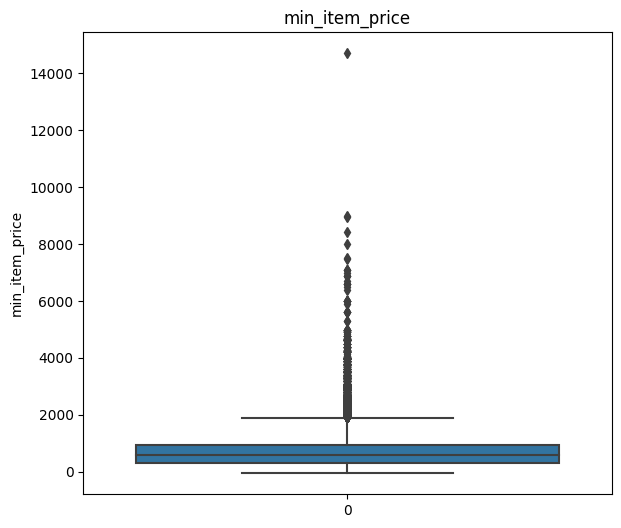

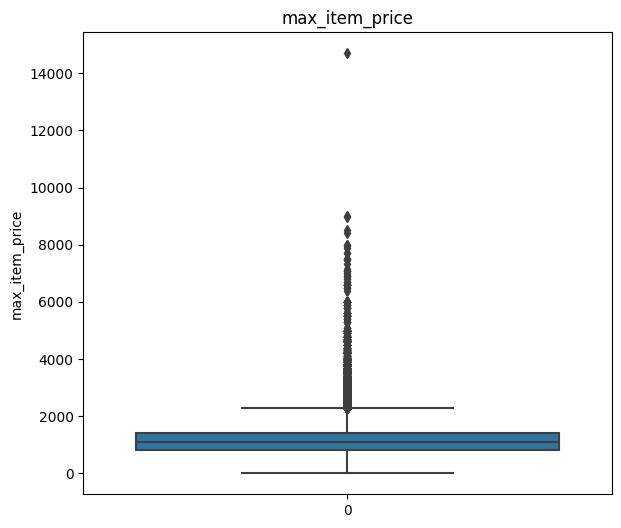

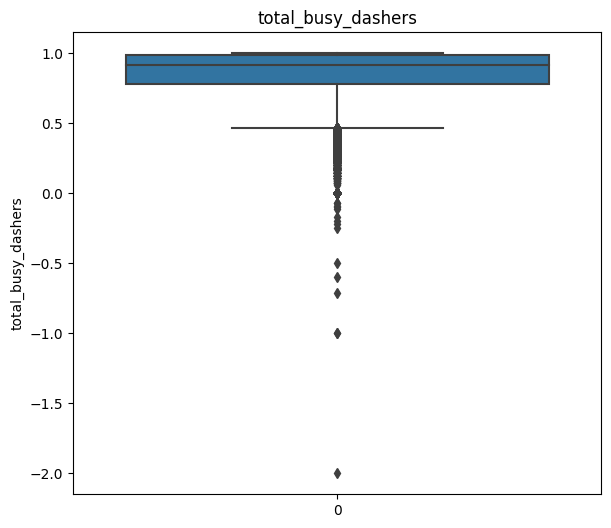

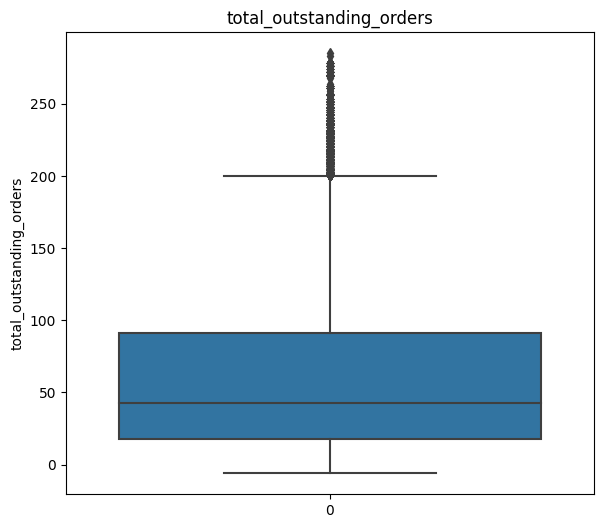

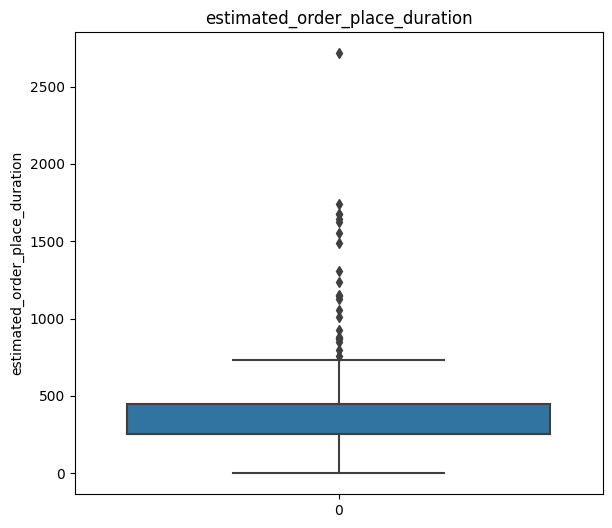

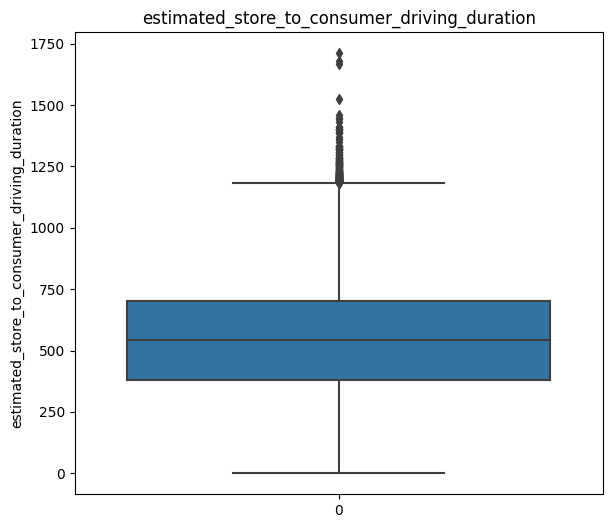

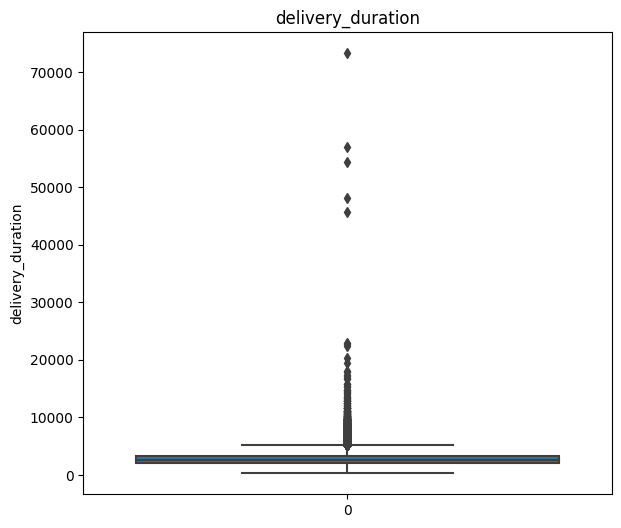

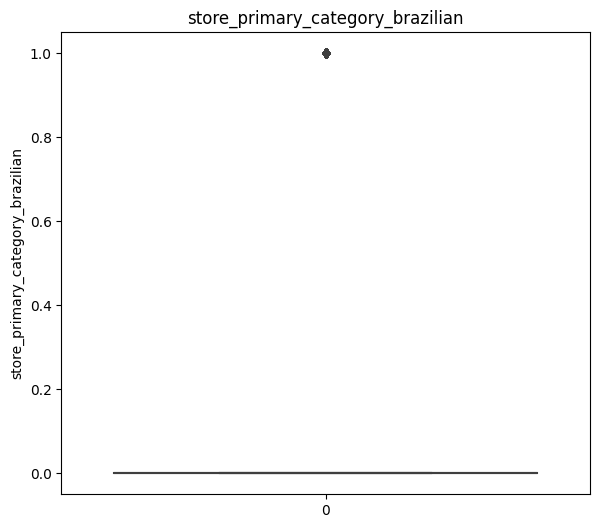

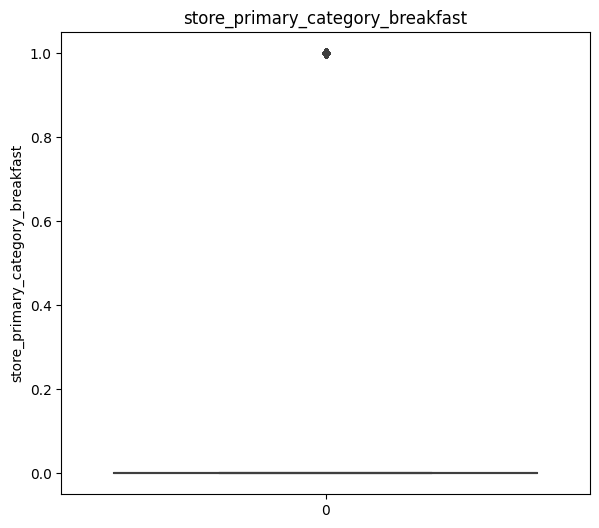

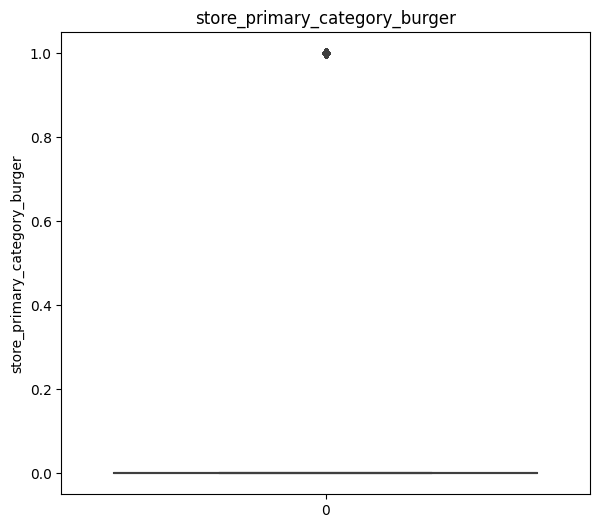

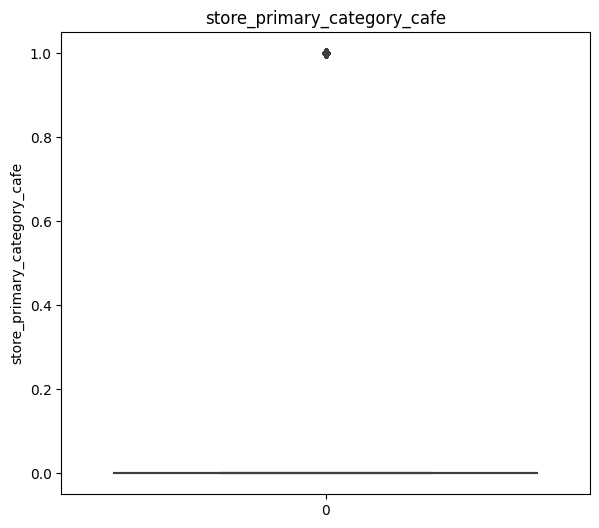

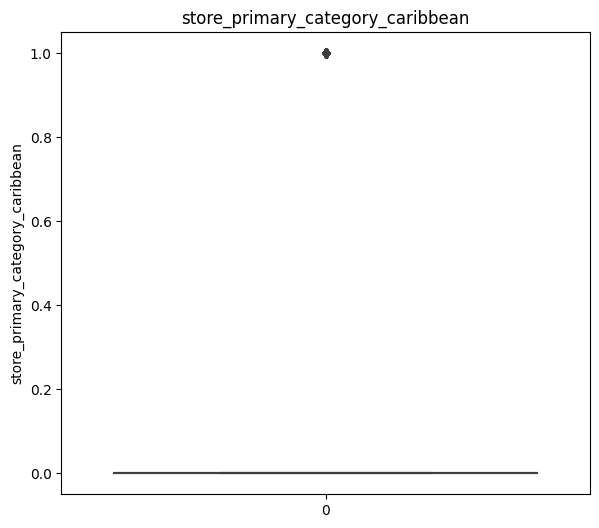

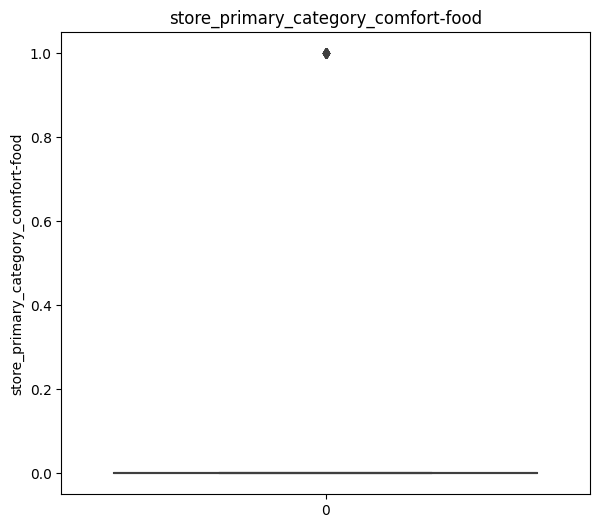

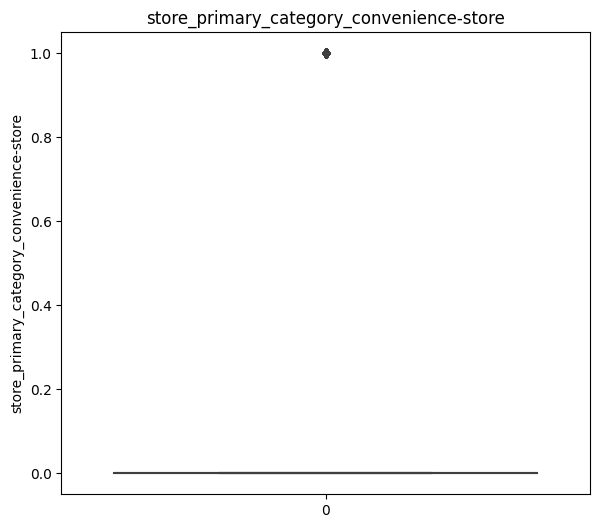

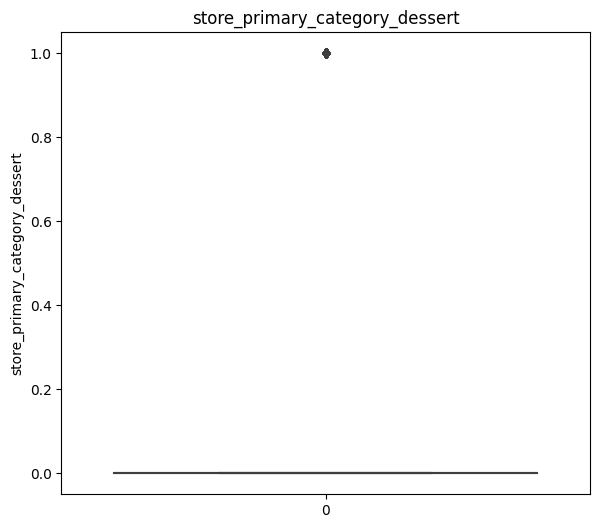

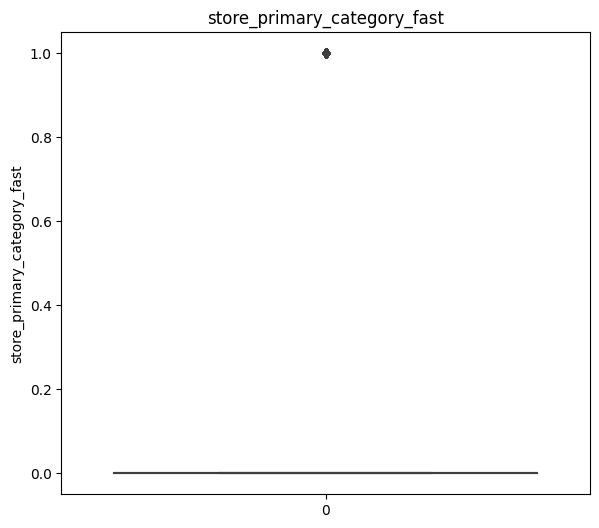

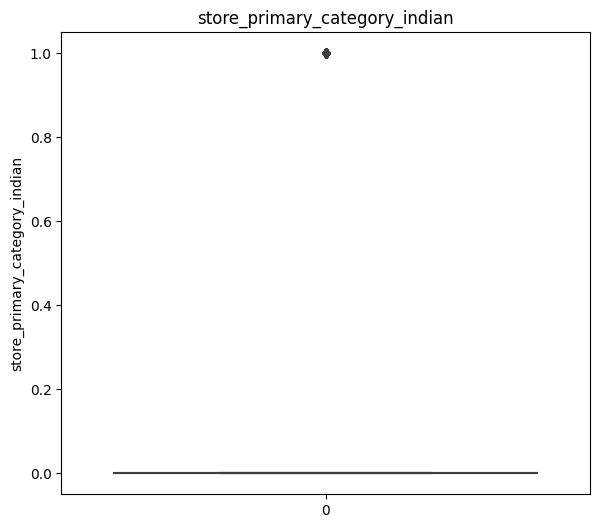

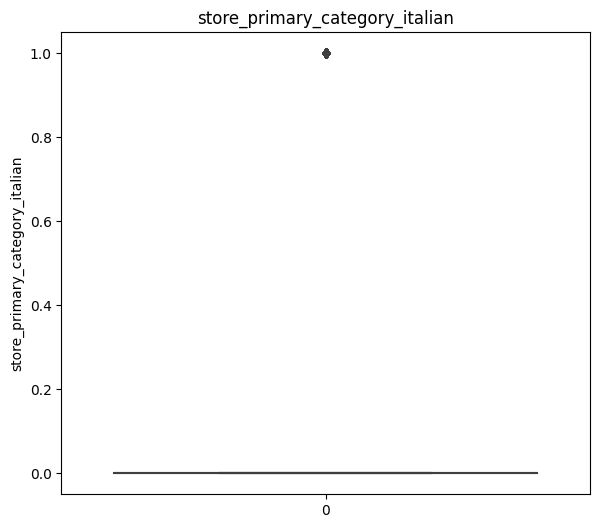

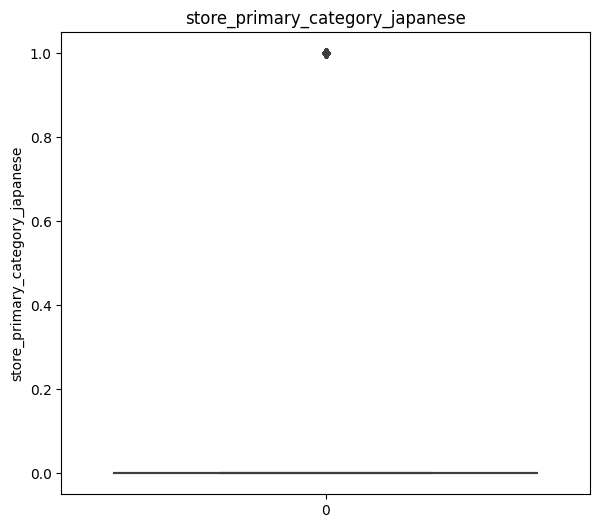

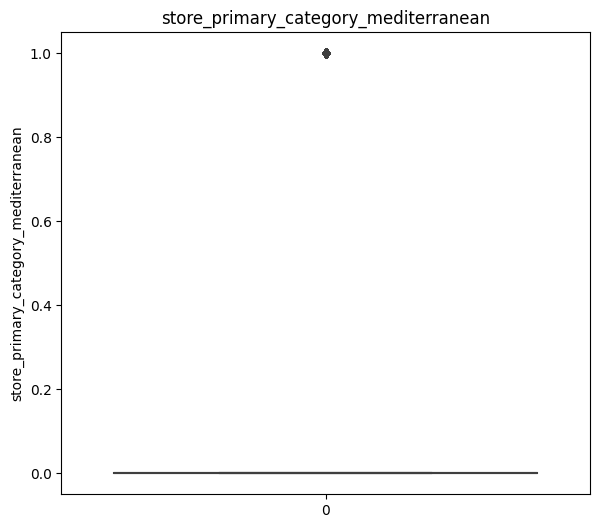

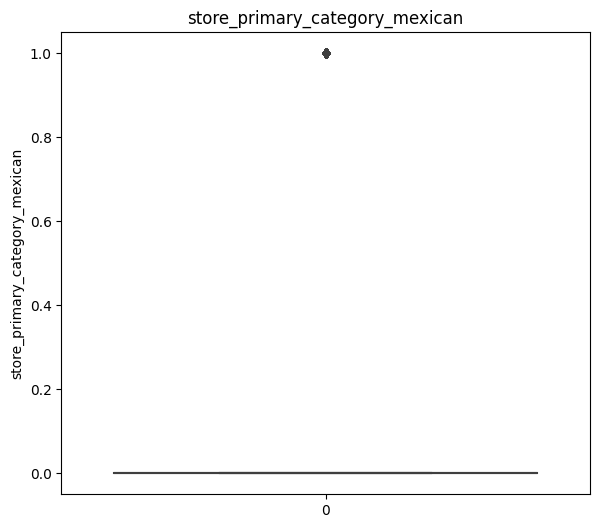

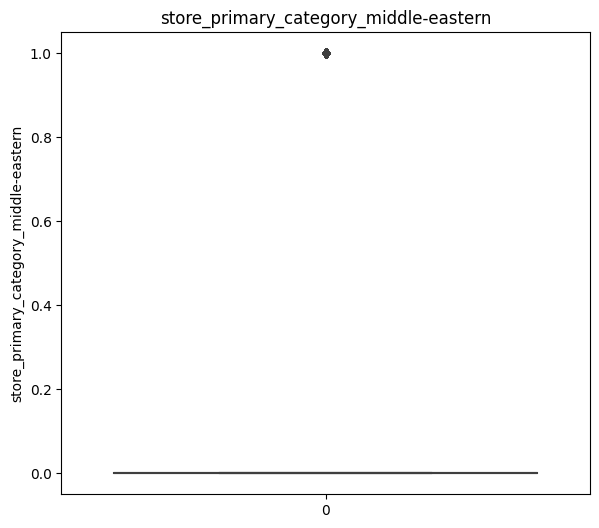

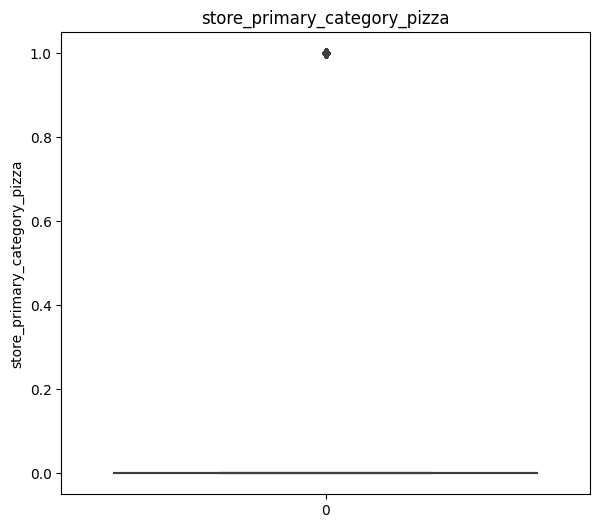

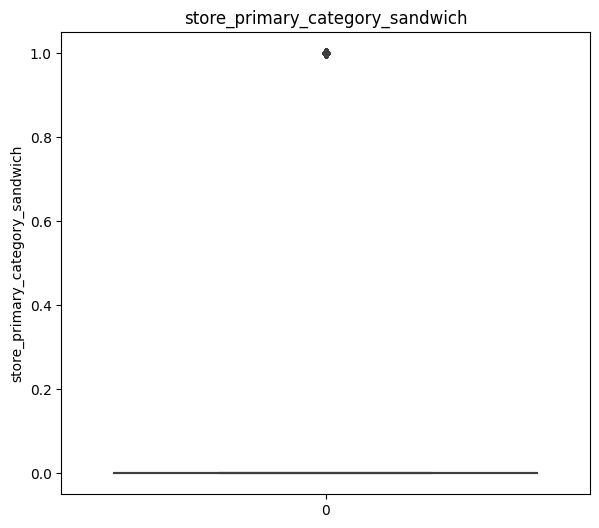

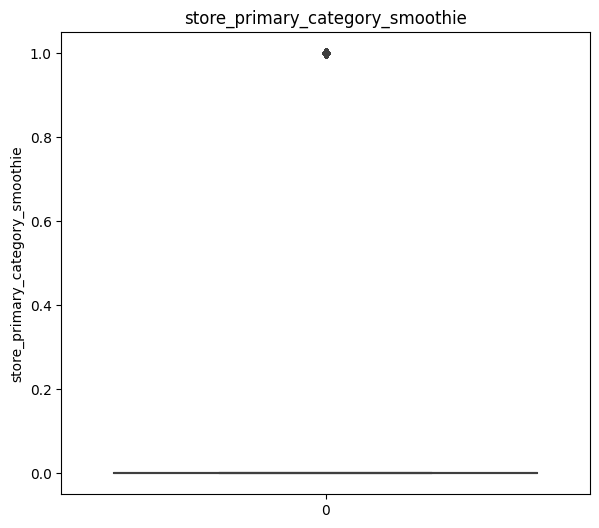

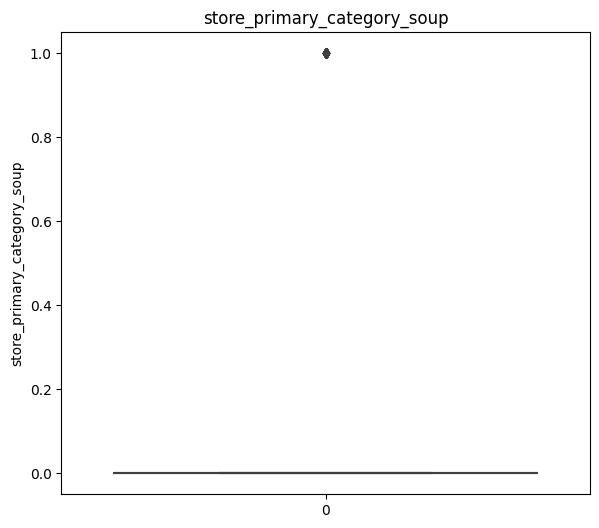

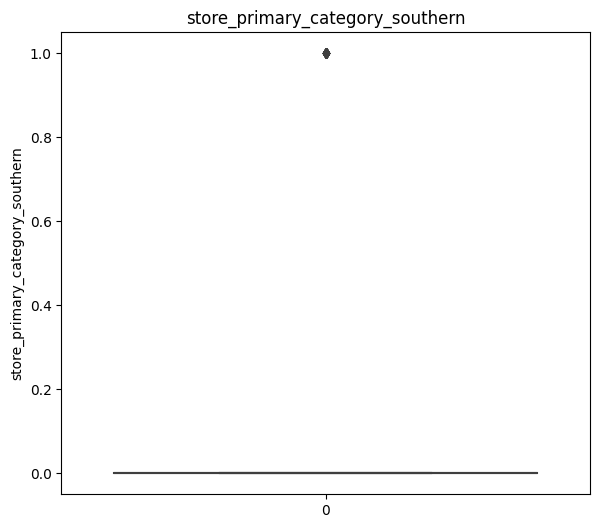

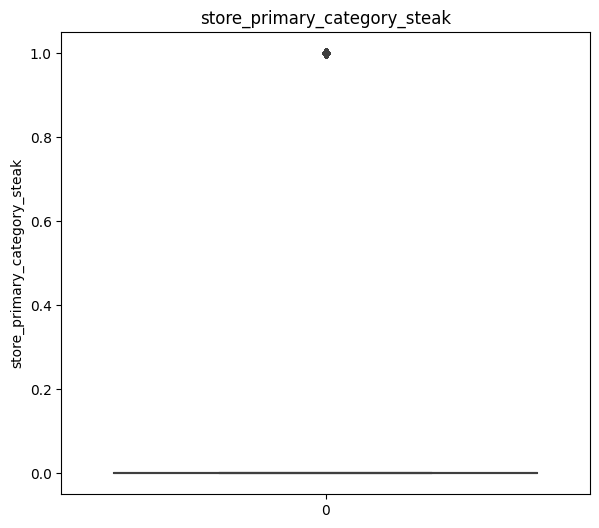

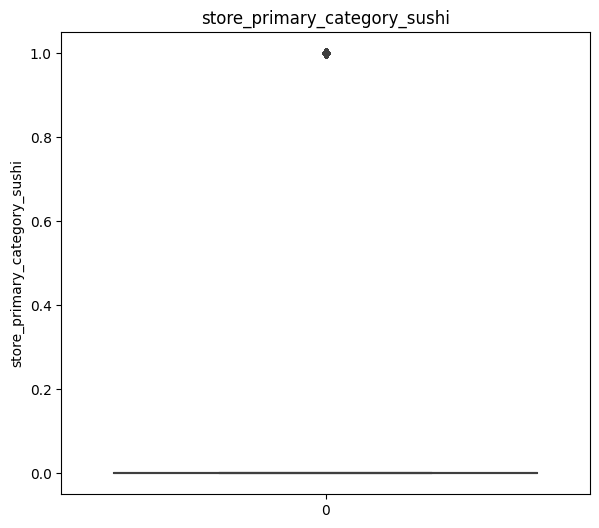

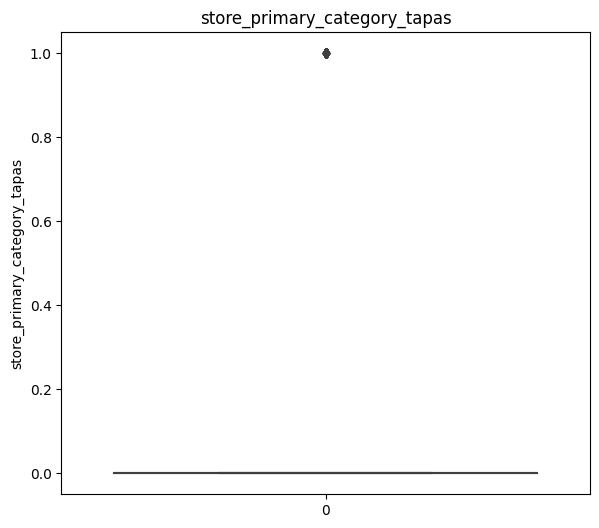

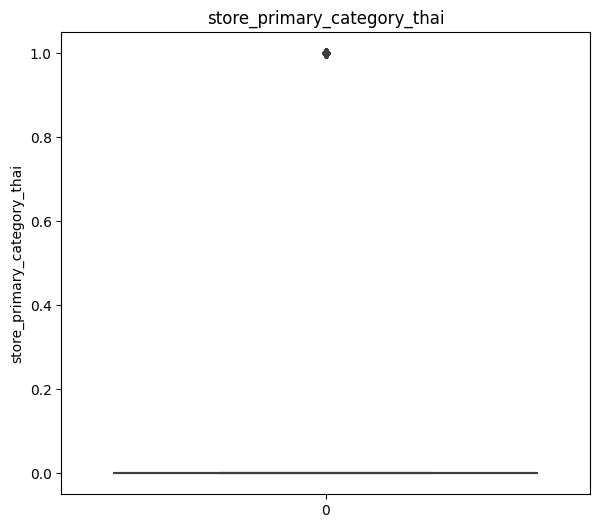

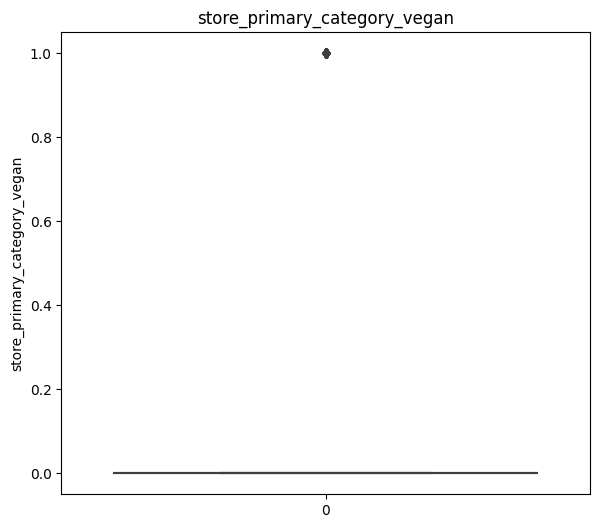

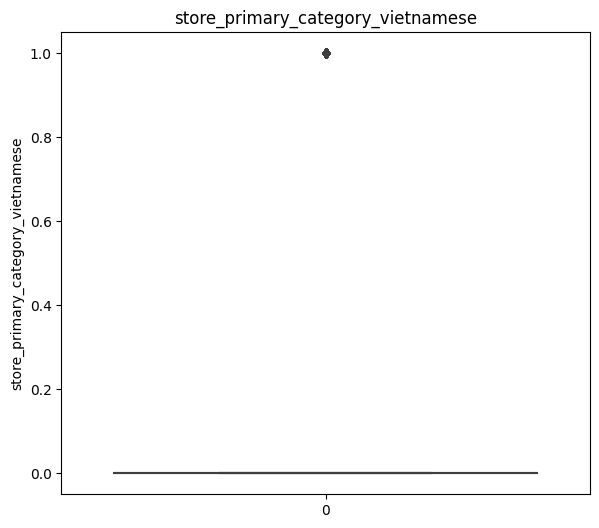

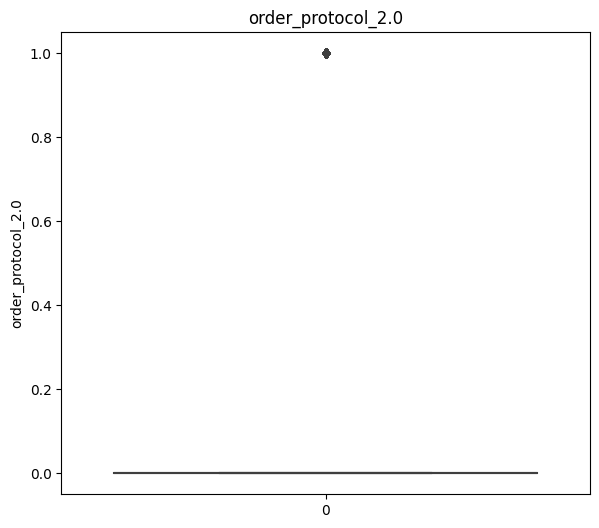

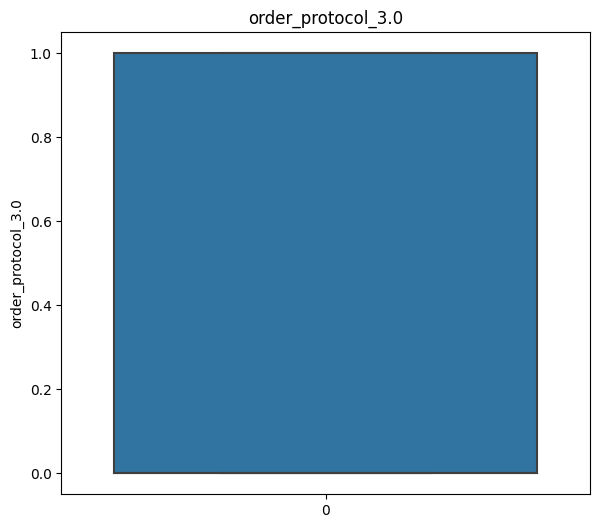

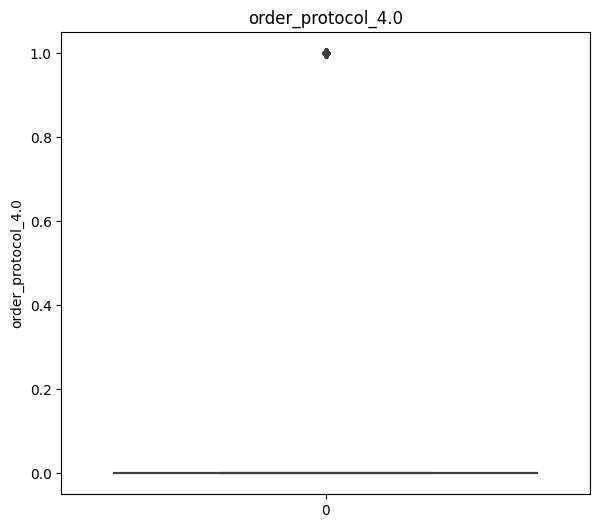

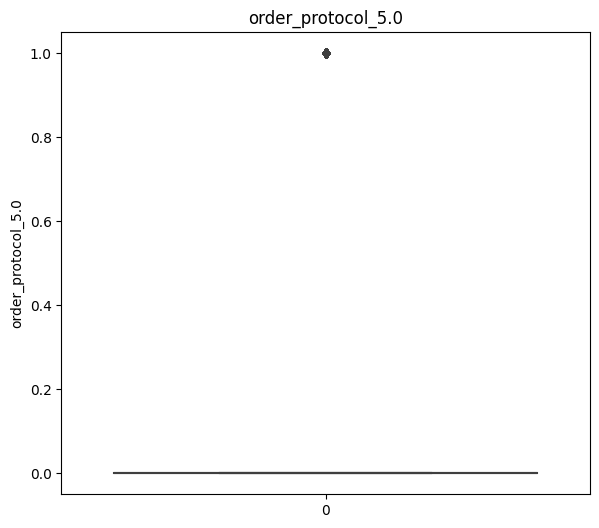

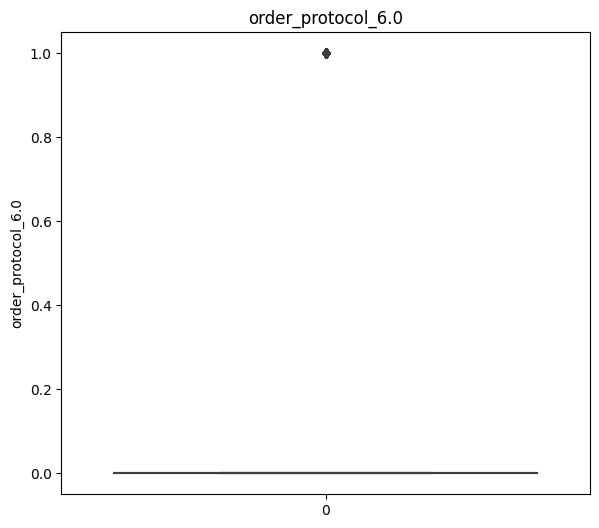

In [213]:
# plotting outliers
num_cols = data_df._get_numeric_data().columns
for var in num_cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=data_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

subtotal


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


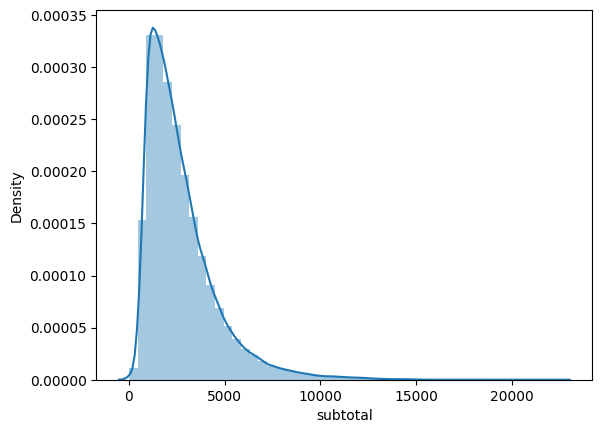

num_distinct_items


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


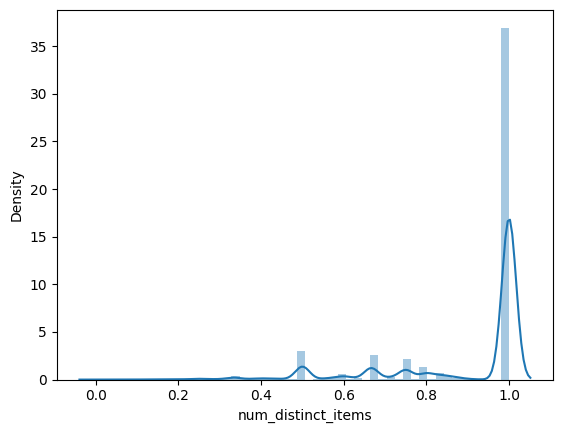

min_item_price


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


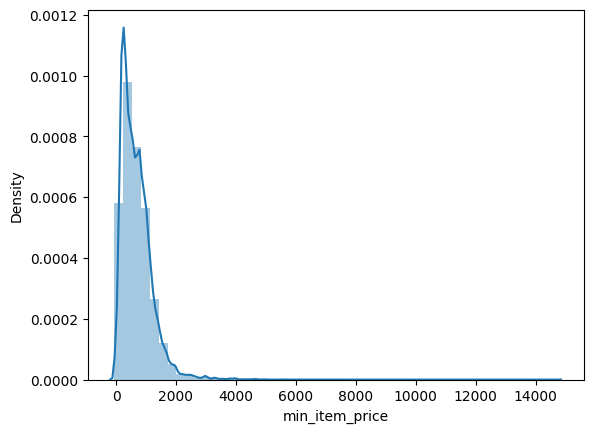

max_item_price


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


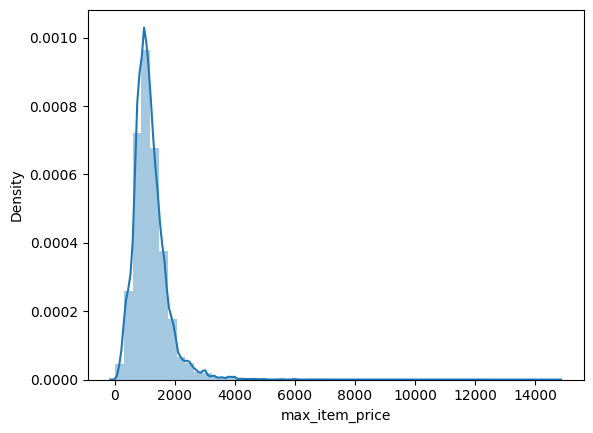

total_busy_dashers


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


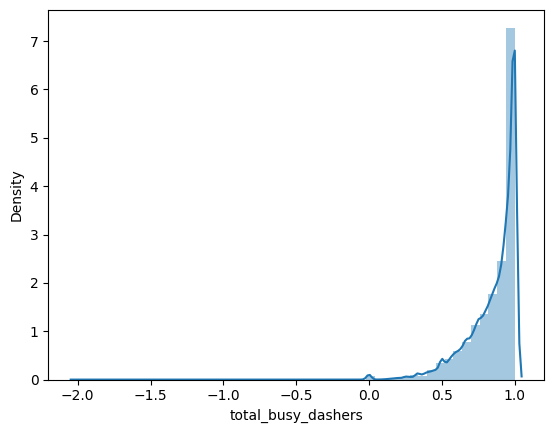

total_outstanding_orders


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


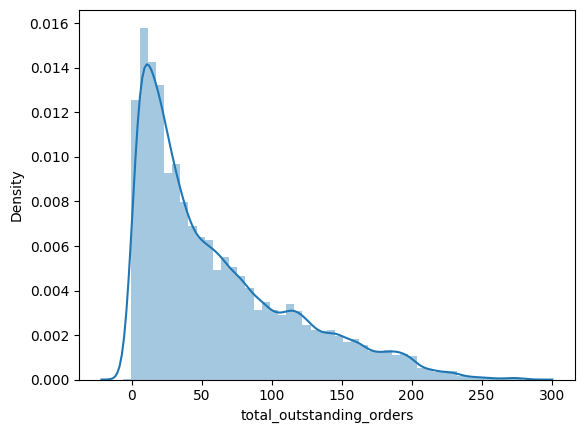

estimated_order_place_duration


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


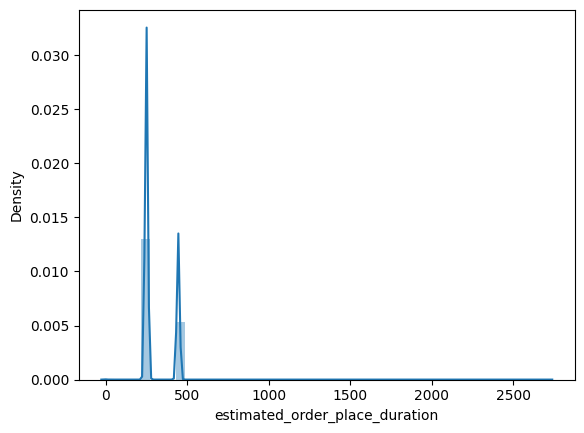

estimated_store_to_consumer_driving_duration


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


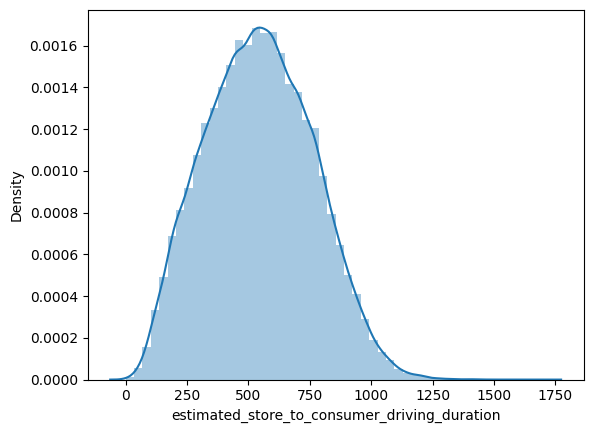

delivery_duration


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


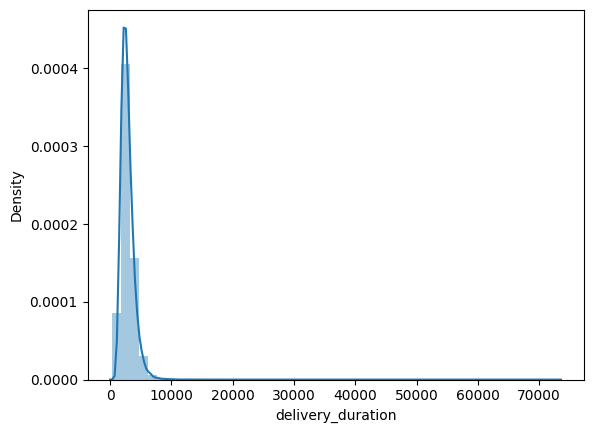

store_primary_category_brazilian


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


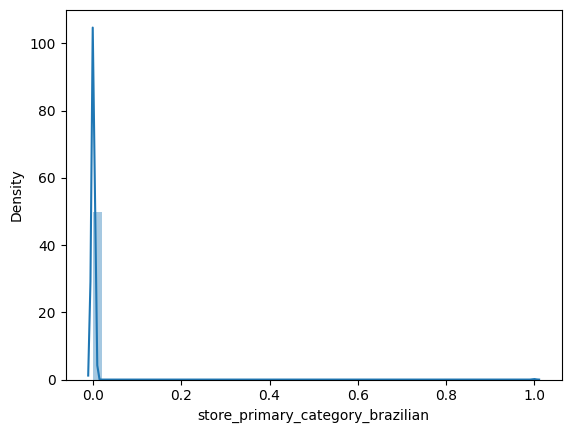

store_primary_category_breakfast


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


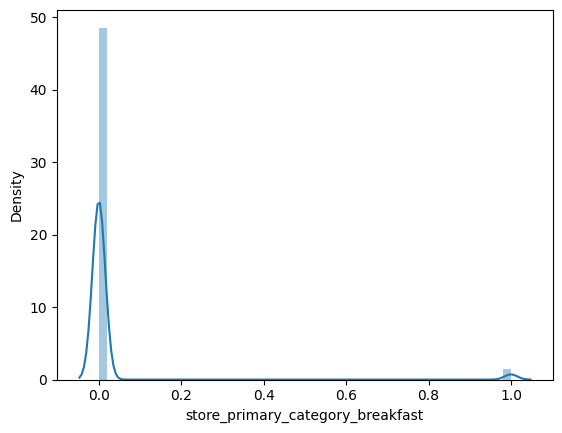

store_primary_category_burger


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


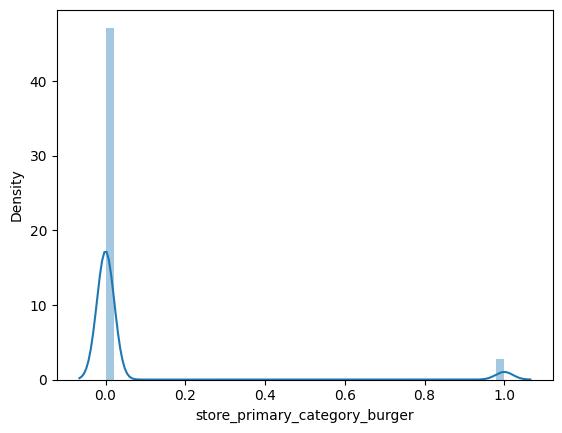

store_primary_category_cafe


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


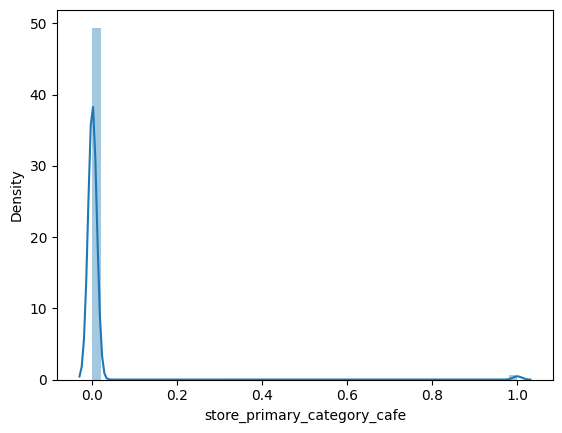

store_primary_category_caribbean


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


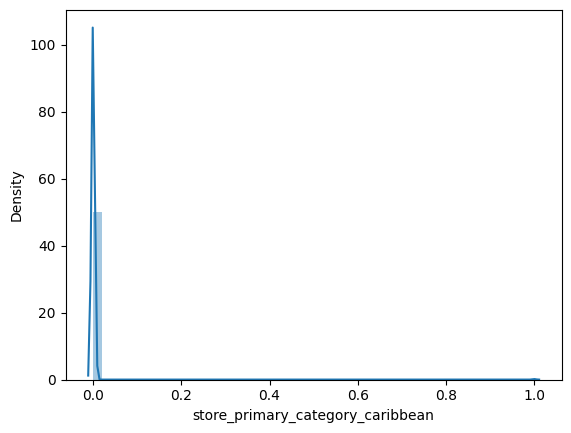

store_primary_category_comfort-food


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


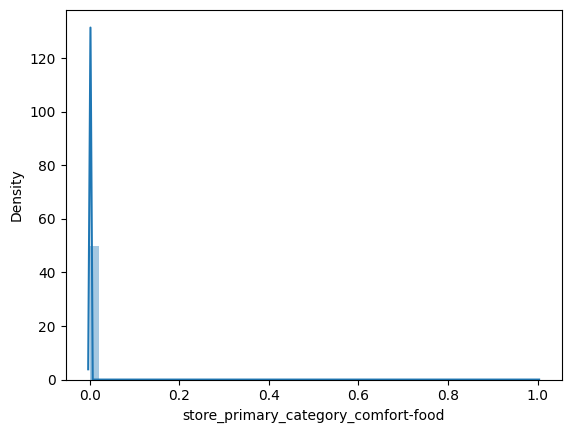

store_primary_category_convenience-store


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


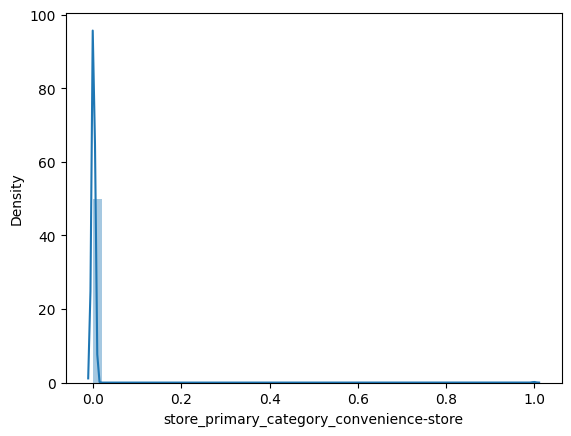

store_primary_category_dessert


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


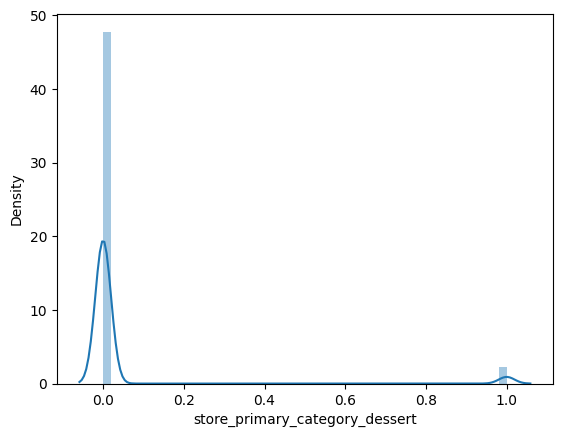

store_primary_category_fast


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


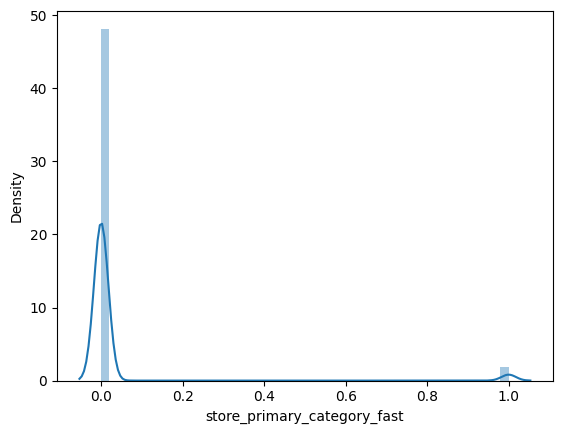

store_primary_category_indian


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


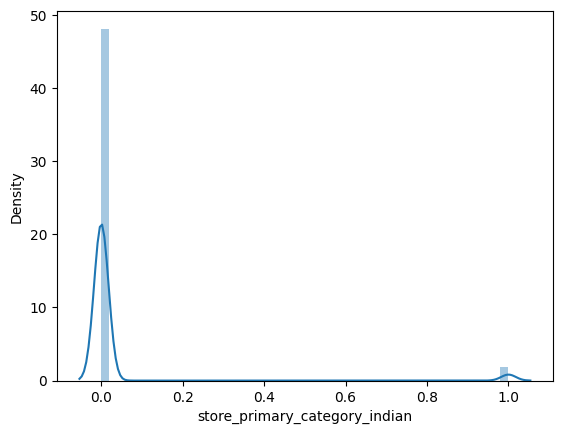

store_primary_category_italian


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


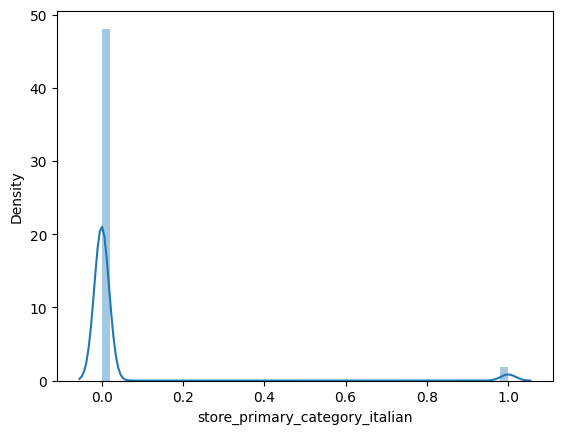

store_primary_category_japanese


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


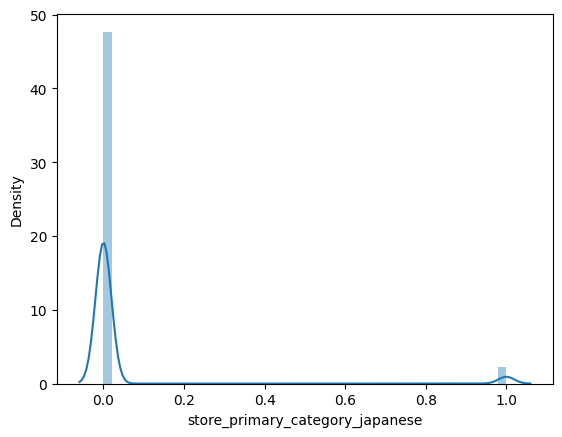

store_primary_category_mediterranean


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


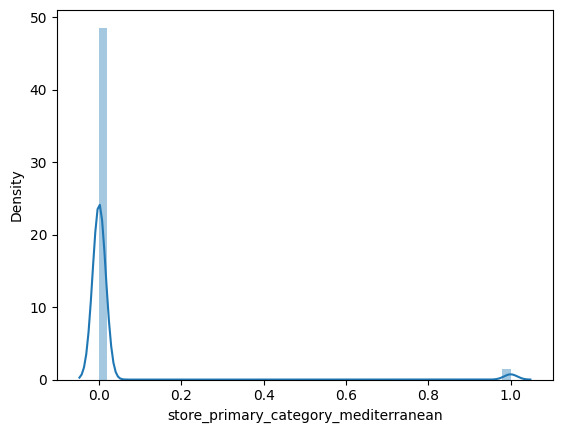

store_primary_category_mexican


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


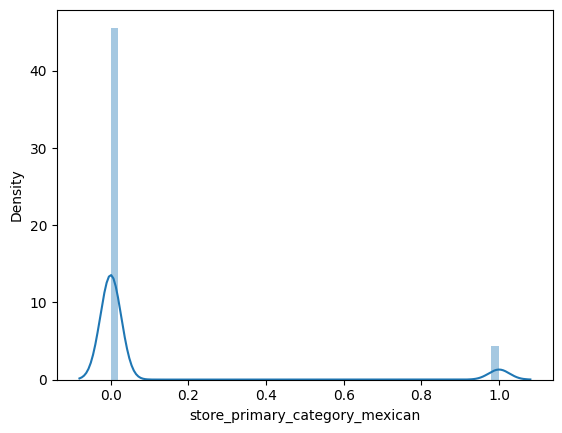

store_primary_category_middle-eastern


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


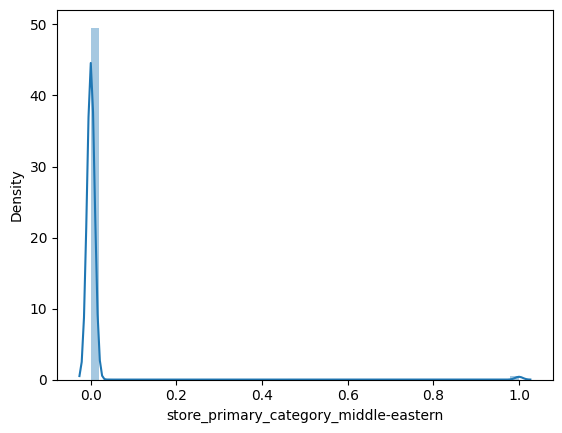

store_primary_category_pizza


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


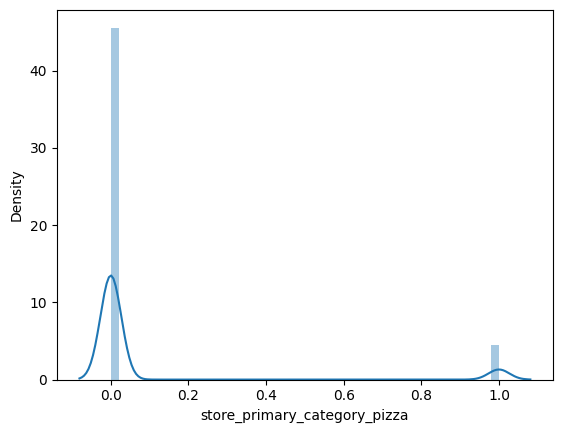

store_primary_category_sandwich


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


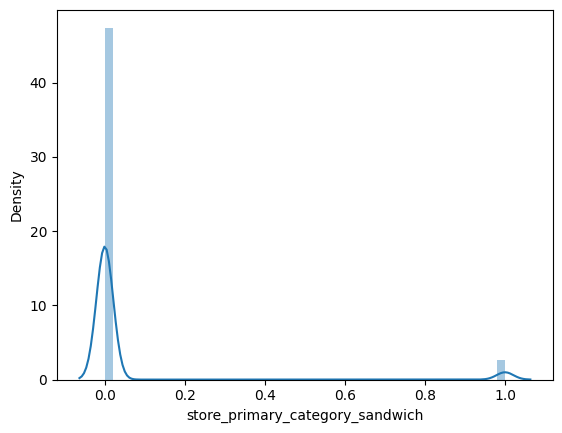

store_primary_category_smoothie


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


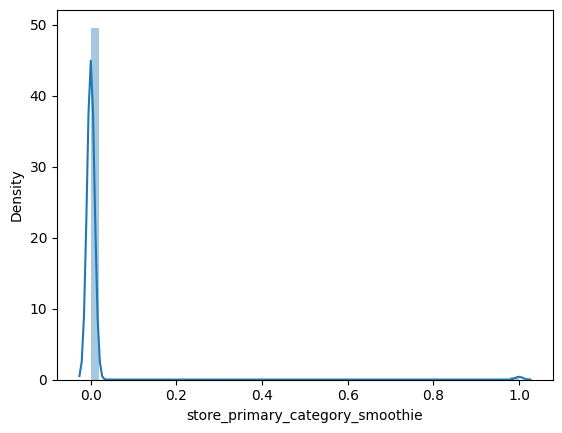

store_primary_category_soup


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


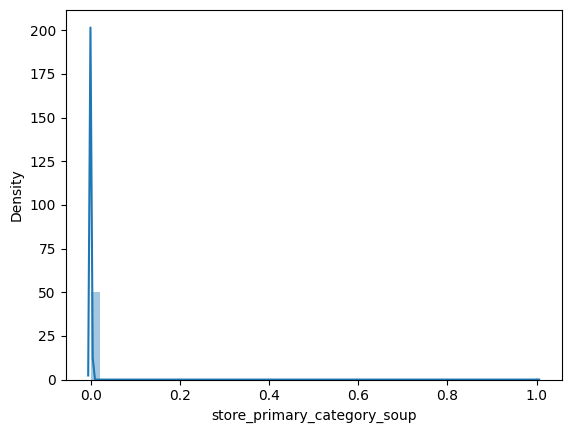

store_primary_category_southern


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


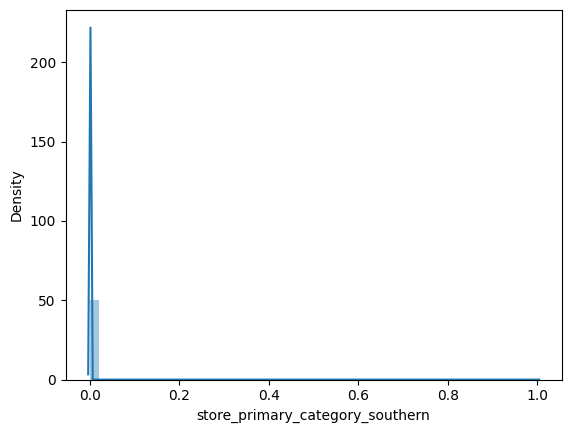

store_primary_category_steak


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


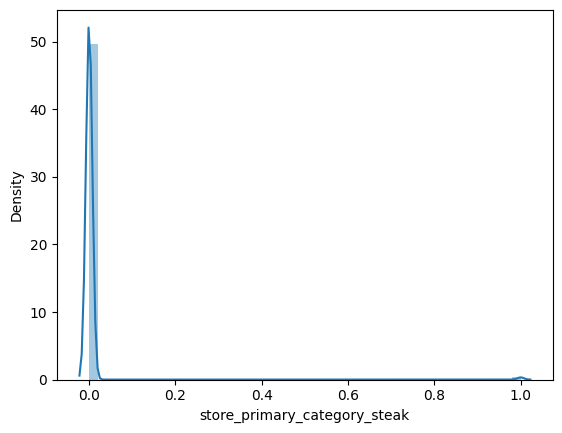

store_primary_category_sushi


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


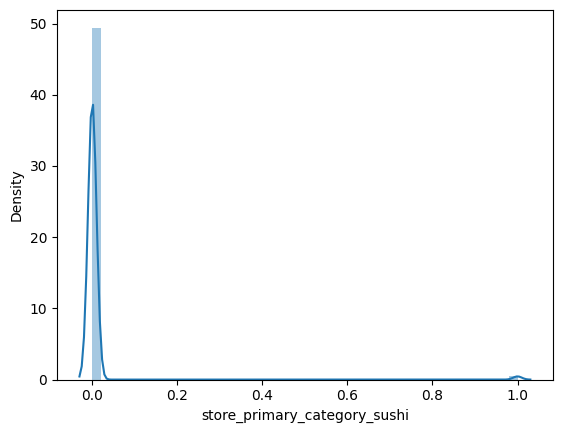

store_primary_category_tapas


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


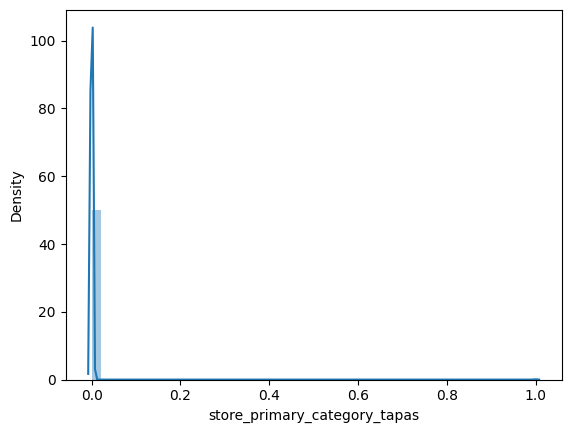

store_primary_category_thai


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


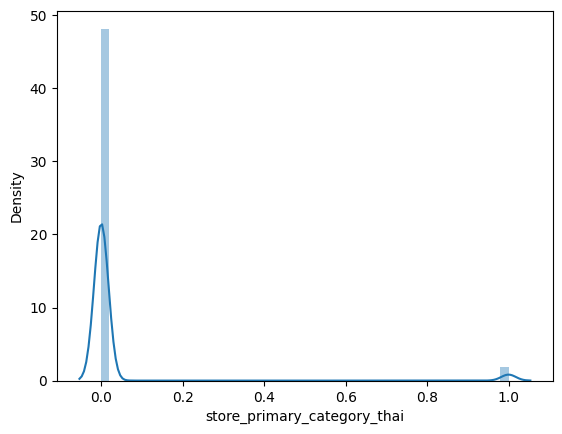

store_primary_category_vegan


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


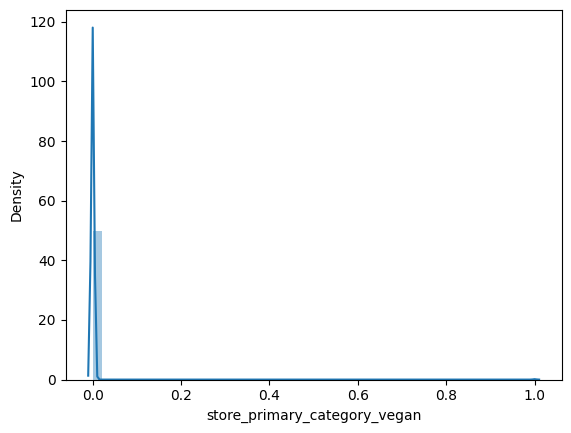

store_primary_category_vietnamese


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


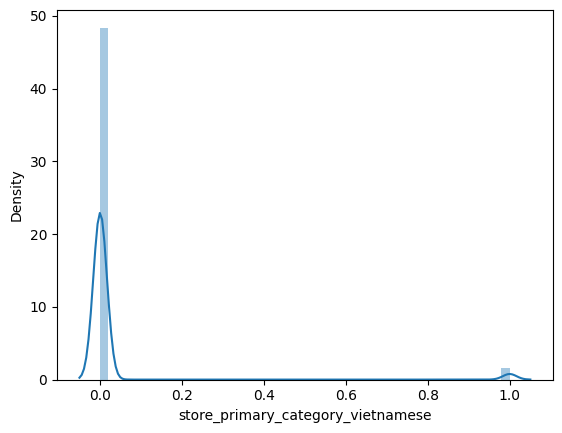

order_protocol_2.0


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


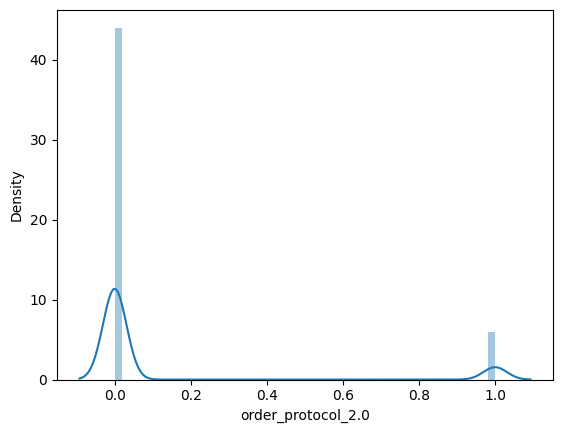

order_protocol_3.0


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


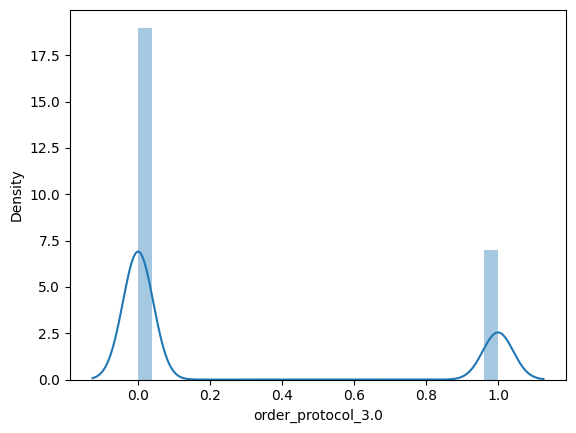

order_protocol_4.0


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


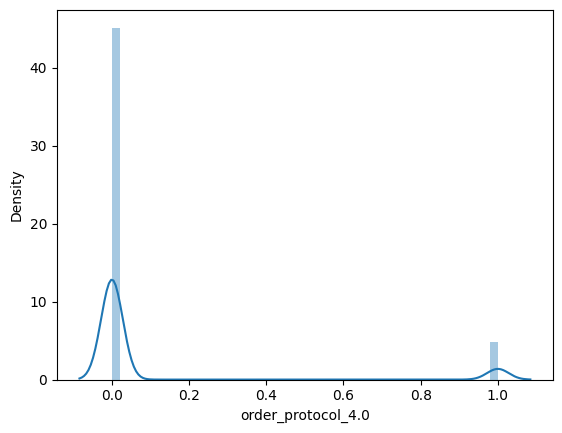

order_protocol_5.0


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


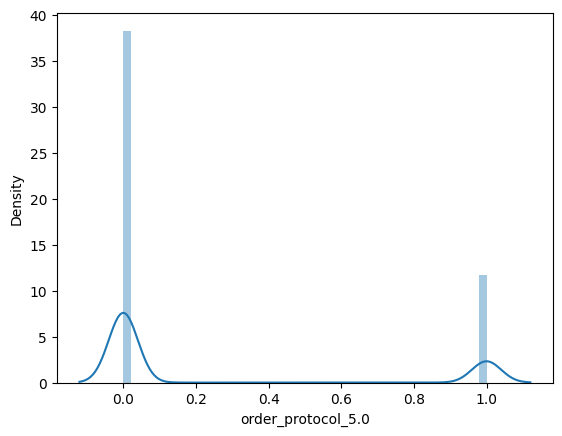

order_protocol_6.0


<ipython-input-214-7c68c04a8096>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[col])


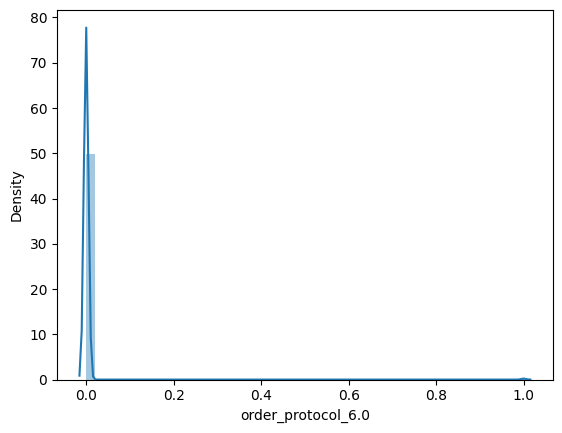

In [214]:
# plotting outliers
cols=data_df.columns
for col in cols:
  print(col)
  sns.distplot(data_df[col])
  plt.show()

In [215]:
# Outlier removal
outlier_var=['subtotal','num_distinct_items','min_item_price','max_item_price','total_busy_dashers', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'delivery_duration']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=data_df[i].quantile(0.25)
    Q3=data_df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =data_df[i].quantile(0.25)-1.5*IQR
    upper_limit =data_df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    data_df.loc[(data_df[i] > upper_limit),i] = np.nan
    data_df.loc[(data_df[i] < lower_limit),i] = np.nan

In [216]:
count_null_df=pd.DataFrame({'columns':data_df.columns,'number_of_nulls_values':data_df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
num_distinct_items,12197
subtotal,5808
max_item_price,4973
total_busy_dashers,4395
delivery_duration,3644
min_item_price,2901
estimated_store_to_consumer_driving_duration,216
estimated_order_place_duration,22
store_primary_category_tapas,0


In [217]:
cols = ["num_distinct_items","total_busy_dashers","total_outstanding_orders","store_primary_category","order_protocol","market_id","estimated_store_to_consumer_driving_duration","actual_delivery_time"]
for col in data_df.columns:
  data_df = data_df[data_df[col].notna()]

In [218]:
data_df

,subtotal,num_distinct_items,min_item_price,max_item_price,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,store_primary_category_brazilian,...,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_vegan,store_primary_category_vietnamese,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0
8,4771.0,0.750000,820.0,1604.0,0.750000,18.0,446.0,289.0,1620.0,0,...,0,0,0,0,0,0,1,0,0,0
15,3620.0,1.000000,1425.0,2195.0,1.000000,7.0,446.0,205.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,0
17,4375.0,1.000000,1325.0,1625.0,0.666667,3.0,446.0,789.0,4980.0,0,...,0,0,0,0,0,0,0,0,0,0
19,950.0,1.000000,150.0,700.0,1.000000,26.0,446.0,212.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,0
21,5800.0,1.000000,700.0,2000.0,1.000000,30.0,446.0,344.0,2820.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197420,2352.0,1.000000,499.0,685.0,1.000000,65.0,251.0,560.0,3360.0,0,...,0,0,0,0,0,0,1,0,0,0
197423,1389.0,1.000000,345.0,649.0,1.000000,23.0,251.0,331.0,3900.0,0,...,0,0,0,0,0,0,0,1,0,0
197424,3010.0,0.666667,405.0,825.0,0.916667,14.0,251.0,915.0,3420.0,0,...,0,0,0,0,0,0,0,1,0,0
197426,1175.0,1.000000,535.0,535.0,1.000000,12.0,446.0,384.0,3900.0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-219-b4e7e847908f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df["delivery_duration"])


<Axes: xlabel='delivery_duration', ylabel='Density'>

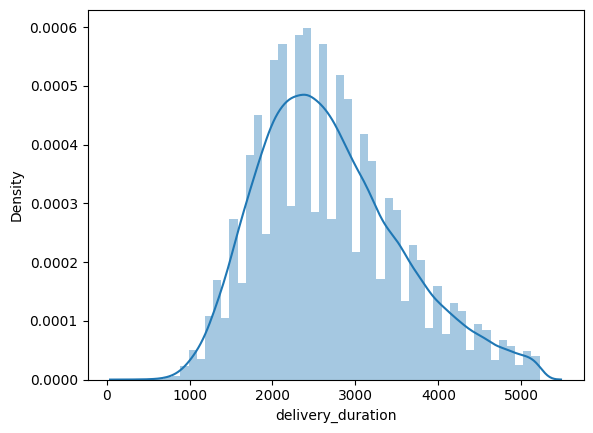

In [219]:
sns.distplot(data_df["delivery_duration"])

# Modelling

In [220]:
# Data matrices creation

y = data_df["delivery_duration"].values
X = data_df.drop(["delivery_duration"], axis=1).values

X

array([[4.77100000e+03, 7.50000000e-01, 8.20000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.62000000e+03, 1.00000000e+00, 1.42500000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.37500000e+03, 1.00000000e+00, 1.32500000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.01000000e+03, 6.66666667e-01, 4.05000000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17500000e+03, 1.00000000e+00, 5.35000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.60500000e+03, 1.00000000e+00, 4.25000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [221]:
X.shape

(100846, 39)

# Feature Selection

In [ ]:
# Feature selection step

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(170441, 10)


# Data split and normalization

In [251]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [252]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80676, 39) (20170, 39) (80676,) (20170,)


In [253]:
y_train = y_train/60
y_test = y_test/60

In [254]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## BASE

In [256]:
from sklearn.metrics import mean_absolute_error
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 11.60


# Linear Regression Model

In [257]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, SGDRegressor
regressor = LinearRegression()
# regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)

LinearRegression()

In [258]:
y_pred = regressor.predict(X_test)

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_pred,y_test)

# R_square
r2 = r2_score(y_test, y_pred)

print('The MAE or J(theta) is: ',mae)
print('r2_score =',r2)

The MAE or J(theta) is:  10.095246044823217
r2_score = 0.21962827955892872


# XGBoost Regressor

In [260]:
! pip install xgboost

In [261]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [262]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

params['eval_metric'] = "mae"
num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[01:22:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:31.28984
[1]	Test-mae:22.04015
[2]	Test-mae:16.05806
[3]	Test-mae:12.74245
[4]	Test-mae:11.11763
[5]	Test-mae:10.37497
[6]	Test-mae:10.05916
[7]	Test-mae:9.93571
[8]	Test-mae:9.89278
[9]	Test-mae:9.87529
[10]	Test-mae:9.88132
[11]	Test-mae:9.88773
[12]	Test-mae:9.89717
[13]	Test-mae:9.90363
[14]	Test-mae:9.90689
[15]	Test-mae:9.90643
[16]	Test-mae:9.89629
[17]	Test-mae:9.89921
[18]	Test-mae:9.89999
[19]	Test-mae:9.89754


In [263]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[01:23:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,31.114224,0.010423,31.114793,0.064136
1,21.859247,0.006855,21.859460,0.061984
2,15.877829,0.004661,15.892142,0.048364
3,12.546920,0.009468,12.597636,0.044249
4,10.907368,0.013307,10.988898,0.056466
5,10.159592,0.016591,10.268611,0.069321
6,9.831798,0.018434,9.962994,0.075077
7,9.697183,0.017537,9.847671,0.079026
8,9.642807,0.020172,9.811079,0.075710
9,9.621945,0.018583,9.805540,0.074824


In [264]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[01:25:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 9.80270146818415 for 8 rounds
CV with max_depth=9, min_child_weight=6
[01:25:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:28] WARNING: ../src/objective/regression_obj.

In [265]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[01:30:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 9.853387087735147 for 9 rounds
CV with subsample=1.0, colsample=0.9
[01:30:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:51] WARNING: ../src/objective/regression_obj.cu:21

In [268]:
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[01:38:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 9.871589295697142 for 8 rounds

CV with eta=0.2
[01:38:30] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor 

In [269]:
params['max_depth'] = 9
params['min_child_weight'] = 5
params['eta'] = 0.005
params['subsample'] = 1
params['colsample_bytree'] = 0.7

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[03:44:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:44.36971
[1]	Test-mae:44.14953
[2]	Test-mae:43.93047
[3]	Test-mae:43.71218
[4]	Test-mae:43.49474
[5]	Test-mae:43.27836
[6]	Test-mae:43.06365
[7]	Test-mae:42.84982
[8]	Test-mae:42.63704
[9]	Test-mae:42.42522
[10]	Test-mae:42.21443
[11]	Test-mae:42.00452
[12]	Test-mae:41.79603
[13]	Test-mae:41.58850
[14]	Test-mae:41.38200
[15]	Test-mae:41.17660
[16]	Test-mae:40.97176
[17]	Test-mae:40.76852
[18]	Test-mae:40.56620
[19]	Test-mae:40.36491
[20]	Test-mae:40.16471
[21]	Test-mae:39.96537
[22]	Test-mae:39.76714
[23]	Test-mae:39.56986
[24]	Test-mae:39.37367
[25]	Test-mae:39.17829
[26]	Test-mae:38.98375
[27]	Test-mae:38.79018
[28]	Test-mae:38.59751
[29]	Test-mae:38.40603
[30]	Test-mae:38.21549
[31]	Test-mae:38.02559
[32]	Test-mae:37.83714
[33]	Test-mae:37.64903
[34]	Test-mae:37.46245
[35]	Test-mae:37.27660
[36]	Test-mae:37.09159
[37]	Test-mae:36.90728
[38]	Test-mae:36.

In [272]:
import xgboost as xg
# xgb = xg.XGBRegressor(n_estimators=500, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=3)
# xgb.fit(X_train,y_train)
pred = model.predict(dtest)
mae = mean_absolute_error(y_test, pred)
print(mae)

9.789743452776642


In [273]:
r2 = r2_score(y_test, pred)
print(r2)

0.24293818200371275


In [274]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
seed = 0

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

elnt = ElasticNet(random_state = seed)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
#xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

def train_r2(model1):
    model1.fit(X_train, y_train)
    return mean_absolute_error(model1.predict(X_test), y_test)

'''Calculate and plot the training accuracy.'''
models = [elnt, rf, ab, gb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1599
[LightGBM] [Info] Number of data points in the train set: 80676, number of used features: 38
[LightGBM] [Info] Start training from score 44.927909


In [275]:
training_score

[11.546494221628784,
 10.083565325684065,
 11.436456603196524,
 9.92666303100858,
 9.84337320923749]

# SVR

In [276]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [277]:
y_pred = regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
import joblib

joblib.dump(regressor, "RandomForestR.joblib")

['RandomForestR.joblib']

In [ ]:
import joblib

RF_R = joblib.load("RandomForestR.joblib")

In [ ]:
y_pred = RF_R.predict(X_test)

In [281]:
mae = mean_absolute_error(y_test, y_pred)
print(maee)

9.847388924421988
